#Image segmentation using UNET in masachusetts building dataset : Building Detection.

# Results and Observations

1. Still - The images having the largest color area that wasn't the building area affects the model's prediction.
        * The green areas offecting the model to predict the buildings near the green area.
        * The river area also affects the model to predict the nearby buildings.
        * The Shore of the beach makes the model to be overfitting.
        * The larger buildings are not detected well.

2. The wall time for train the model with 100 epochs : 22 mins 26 sec (increased)
-----------------------------------
3. Metrics of the model:

    Metrics from train set:
        IoU       : 0.87048 --incresed
        Dice Loss : 0.07061 --decreased
        Accuracy  : 0.93037 --increased
        precision : 0.92799 --increased
        recall    : 0.93316 --increased
        FScore    : 0.93057 --increased
    -----------------------------------

    Metrics from valid set:
        IoU       : 0.83099 --increased
        Dice Loss : 0.09411 --decreased
        Accuracy  : 0.90898 --increased
        precision : 0.88402 --increased
        recall    : 0.93134 --decreased
        FScore    : 0.90706 --increased

4. UNet 2 and 5

Best Model: 86
-----------------------------------
    Metrics from train set:
      IoU       : 0.85924
      Dice Loss : 0.08099
      Accuracy  : 0.92346
      precision : 0.92221
      recall    : 0.92495
      FScore    : 0.92358
-----------------------------------

    Metrics from valid set:
      IoU      : 0.83692
      Dice Loss: 0.09426
      Accuracy : 0.91253
      precision : 0.88858
      recall    : 0.93362
      FScore    : 0.91055


In [1]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
!pip install --force-reinstall albumentations==1.0.3

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-nxo9m732
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-nxo9m732
  Resolved https://github.com/albu/albumentations to commit 2e1bbec7895ead9be76351c17666b0b537530dc9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 253.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 185.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.5/680.5 kB 362.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.4/291.4 kB 356.5 MB/s eta 0:00:00
  Created wheel for albumentations: filename=albumentations-1.4.21-py3-none-any.whl size=231334 sha256=635106f09d53009647524253efd268798d9125b5eb9549ed3c0fe

In [2]:
!pip install -q -U segmentation-models-pytorch albumentations > /dev/null

In [3]:
!pip install segmentation-models-pytorch==0.2.1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 11.3 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12403 sha256=1d9d4390f4cd00c89f00d5a4a3cf0dd50b5feaf1c117e2045bdd54492146394b
  Stored in directory: /root/.cache/pip/wheels/61/3a/b0/0b4c443c380bd934701b0a25e4aed76479e4fcaf1a6f955664
Successfully built efficientnet-pytorch
  Attempting uninstall: efficientnet-pytorch
    Found existing installation: efficientnet_pytorch 0.7.1
    Uninstalling efficientnet_pytorch-0.7.1:
      Successfully uninstalled efficientnet_pytorch-0.7.1
  Attempting uninstall: timm
    Found existing installation: timm 0.9.7
    Uninstalling timm-0.9.7:
      Successfully uninstalled timm-0.9.7
  Attempting uninstall: segmentation-models-pytorch
    Found existing installation: segmentation-models-pytorch 0.3.4
    

In [4]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 87.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


# Mount GDrive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [6]:
import os,cv2
import numpy as np
import pandas as pd
import random, tqdm
#! conda  install --yes seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# Torch libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album
import torch.nn.functional as F
# import pydensecrf.densecrf as dcrf
# from pydensecrf.utils import unary_from_labels, create_pairwise_bilateral, create_pairwise_gaussian


In [7]:
torch.cuda.is_available()

False

In [8]:
import segmentation_models_pytorch as smp

# Creating directories for x_train, y_train, x_test, y_test

In [9]:
DATA_DIR = "/content/drive/MyDrive/Massh/data/tiff//"

x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'train_labels')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'val_labels')

x_test_dir = os.path.join(DATA_DIR, 'test')#/content/drive/MyDrive/massachusetts_building_data/data/tiff/Clustered_buildings
y_test_dir = os.path.join(DATA_DIR, 'test_labels')#/content/drive/MyDrive/massachusetts_building_data/data/tiff/Clustered_buildings_label

# Defining class names and class rgb values

In [10]:
#class_dict = pd.read_csv("/content/drive/MyDrive/massachusetts_building_data/data/label_class_dict.csv")
# Get class names
#class_names = class_dict['name'].tolist()
# Get class RGB values
#class_rgb_values = class_dict[['r', 'g', 'b']].values.tolist()

#print('All dataset classes and their corresponding RGB values in labels:')
#print('Class Names: ', class_names)
#print('Class RGB values: ', class_rgb_values)

In [11]:
# Useful to shortlist specific classes in datasets with large number of classes
class_names = ['background', 'building']
select_classes=class_names
class_rgb_values= [[0, 0, 0], [255, 255, 255]]

# Get RGB values of required classes
select_class_indices = [class_names.index(cls.lower()) for cls in select_classes]
select_class_rgb_values =  np.array(class_rgb_values)[select_class_indices]

print('Selected classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

Selected classes and their corresponding RGB values in labels:
Class Names:  ['background', 'building']
Class RGB values:  [[0, 0, 0], [255, 255, 255]]


# Helper functions for data visualization.

In [12]:
  # Helper function for data visualization
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize = (20, 8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]);
        plt.yticks([])
        # Get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize = 20)
        plt.imshow(image)
    plt.show()

# Perform one hot encoding on label
def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes

    # Arguments
        label: The 2D array segmentation image label
        label_values

    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis = -1)

    return semantic_map

# Perform reverse one-hot-encoding on labels / preds
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.

    # Arguments
        image: The one-hot format image

    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x

# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.

    # Arguments
        image: single channel array where each value represents the class key.
        label_values

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

In [13]:
class BuildingsDataset(torch.utils.data.Dataset):
    """
    Massachusetts Buildings Dataset. Read images, apply augmentation and preprocessing transformations.

    Arguments:
        images_dir (str) : path to images folder
        masks_dir (str) : path to segmentation masks folder
        class_rgb_values (list) : RGB values of select classes to extract from segmentation mask
        augmentation (albumentations.Compose) : data transfromation pipeline (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose) : data preprocessing (e.g. noralization, shape manipulation, etc.)
    """

    def __init__(
            self,
            images_dir,
            masks_dir,
            class_rgb_values = None,
            augmentation = None,
            preprocessing = None,
    ):

        self.image_paths = [os.path.join(images_dir, image_id) for image_id in sorted(os.listdir(images_dir))]
        self.mask_paths = [os.path.join(masks_dir, image_id) for image_id in sorted(os.listdir(masks_dir))]

        self.class_rgb_values = class_rgb_values
        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):

        # Read images and masks
        image = cv2.cvtColor(cv2.imread(self.image_paths[i]), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(self.mask_paths[i]), cv2.COLOR_BGR2RGB)

        # One-hot-encode the mask
        mask = one_hot_encode(mask, self.class_rgb_values).astype('float')

        # Apply augmentations
        if self.augmentation:
            sample = self.augmentation(image = image, mask = mask)
            image, mask = sample['image'], sample['mask']

        # Apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image = image, mask = mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        # Return length
        return len(self.image_paths)

In [14]:
dataset = BuildingsDataset(x_train_dir, y_train_dir, class_rgb_values = select_class_rgb_values)
random_idx = random.randint(0, len(dataset) - 1)
image,mask= dataset[1]



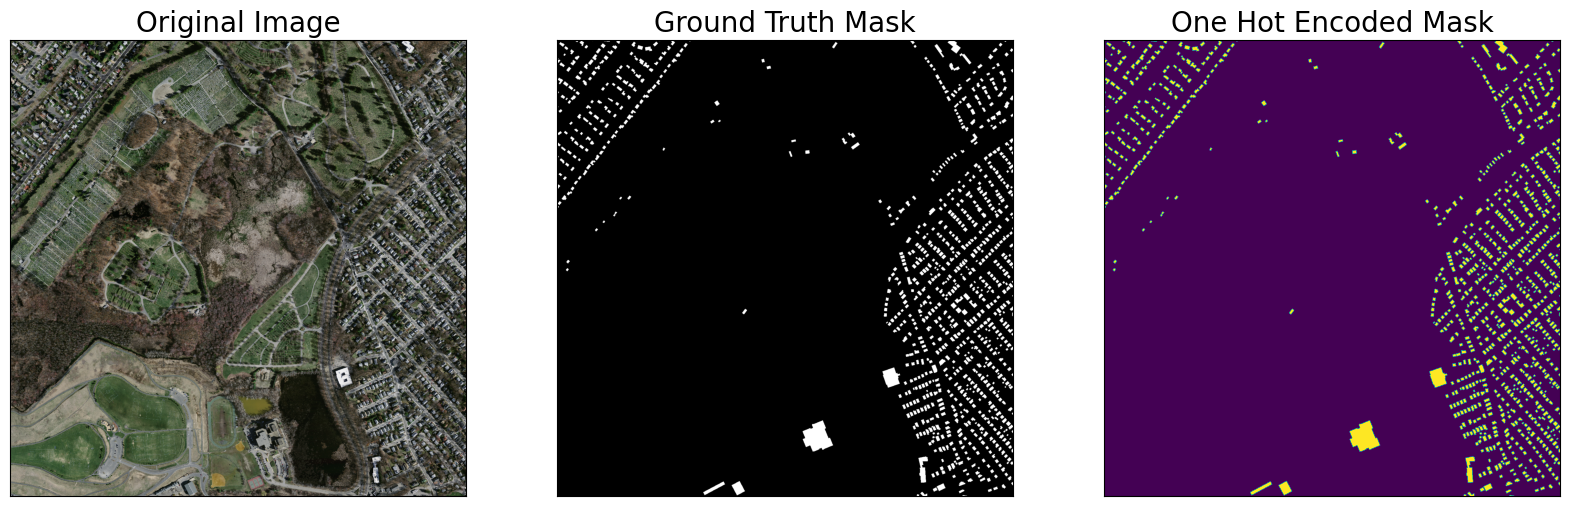

In [15]:
visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

# Data Augmentation

In [16]:
def get_training_augmentation():
    train_transform = [
        album.RandomCrop(height = 256, width = 256, always_apply = True),
        album.OneOf(
            [
                album.HorizontalFlip(p = 1),
                album.VerticalFlip(p = 1),
                album.RandomRotate90(p = 1),
            ],
            p = 0.75,
        ),
    ]
    return album.Compose(train_transform)

def get_validation_augmentation():
    # Add sufficient padding to ensure image is divisible by 32
    test_transform = [
        album.PadIfNeeded(min_height = 1536, min_width = 1536, always_apply = True, border_mode = 0, value=0),
    ]
    return album.Compose(test_transform)

def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

def get_preprocessing(preprocessing_fn=None):
    """
    Construct preprocessing transform

    Arguments:
        preprocessing_fn (callable): data normalization function (can be specific for each pretrained neural network)
    Returns:
        transform: albumentations.Compose
    """
    _transform = []
    if preprocessing_fn:
        _transform.append(album.Lambda(image = preprocessing_fn))
    _transform.append(album.Lambda(image = to_tensor, mask = to_tensor))

    return album.Compose(_transform)

In [17]:
augmented_dataset = BuildingsDataset(
    x_train_dir, y_train_dir,
    augmentation = get_training_augmentation(),
    class_rgb_values = select_class_rgb_values,
)

In [18]:
random_idx = random.randint(0, len(augmented_dataset) - 1)
# Different augmentations on a random image / mask pair (256 * 256 crop)
for i in range(3):
    image, mask = augmented_dataset[random_idx]
    visualize(
        original_image = image,
        ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
        one_hot_encoded_mask = reverse_one_hot(mask)
    )

Output hidden; open in https://colab.research.google.com to view.

In [19]:
IN_CHANNELS = 3 # Number of input channels (e.g. RGB)
N_CLASSES=2

## Create Model

In [20]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cpu


# 3. Add your Architecture here

# **Creating Model**

In [21]:
#model = smp.MAnet(encoder_name='resnet34', encoder_depth=5, encoder_weights='imagenet', decoder_use_batchnorm=True, decoder_channels=(256, 128, 64, 32, 16), decoder_pab_channels=64, in_channels=3, classes=2, activation="sigmoid", aux_params=None)

# https://github.com/huggingface/transformers/blob/c28d04e9e252a1a099944e325685f14d242ecdcd/src/transformers/models/gpt2/modeling_gpt2.py#L454


In [22]:
!pip install mamba_ssm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [23]:
from dataclasses import dataclass, field


@dataclass
class MambaConfig:

    d_model: int = 2560
    d_intermediate: int = 0
    n_layer: int = 64
    vocab_size: int = 50277
    ssm_cfg: dict = field(default_factory=dict)
    attn_layer_idx: list = field(default_factory=list)
    attn_cfg: dict = field(default_factory=dict)
    rms_norm: bool = True
    residual_in_fp32: bool = True
    fused_add_norm: bool = True
    pad_vocab_size_multiple: int = 8
    tie_embeddings: bool = True

In [24]:

def create_block(
    d_model,
    d_intermediate,
    ssm_cfg=None,
    attn_layer_idx=None,
    attn_cfg=None,
    norm_epsilon=1e-5,
    rms_norm=False,
    residual_in_fp32=False,
    fused_add_norm=False,
    layer_idx=None,
    device=None,
    dtype=None,
):
    if ssm_cfg is None:
        ssm_cfg = {}
    if attn_layer_idx is None:
        attn_layer_idx = []
    if attn_cfg is None:
        attn_cfg = {}
    factory_kwargs = {"device": device, "dtype": dtype}
    if layer_idx not in attn_layer_idx:
        # Create a copy of the config to modify
        ssm_cfg = copy.deepcopy(ssm_cfg) if ssm_cfg is not None else {}
        ssm_layer = ssm_cfg.pop("layer", "Mamba1")
        if ssm_layer not in ["Mamba1", "Mamba2"]:
            raise ValueError(f"Invalid ssm_layer: {ssm_layer}, only support Mamba1 and Mamba2")
        mixer_cls = partial(
            Mamba2 if ssm_layer == "Mamba2" else Mamba,
            layer_idx=layer_idx,
            **ssm_cfg,
            **factory_kwargs
        )
    else:
        mixer_cls = partial(MHA, layer_idx=layer_idx, **attn_cfg, **factory_kwargs)
    norm_cls = partial(
        nn.LayerNorm if not rms_norm else RMSNorm, eps=norm_epsilon, **factory_kwargs
    )
    if d_intermediate == 0:
        mlp_cls = nn.Identity
    else:
        mlp_cls = partial(
            GatedMLP, hidden_features=d_intermediate, out_features=d_model, **factory_kwargs
        )
    block = Block(
        d_model,
        mixer_cls,
        mlp_cls,
        norm_cls=norm_cls,
        fused_add_norm=fused_add_norm,
        residual_in_fp32=residual_in_fp32,
    )
    block.layer_idx = layer_idx
    return block

In [25]:
def _init_weights(
    module,
    n_layer,
    initializer_range=0.02,  # Now only used for embedding layer.
    rescale_prenorm_residual=True,
    n_residuals_per_layer=1,  # Change to 2 if we have MLP
):
    if isinstance(module, nn.Linear):
        if module.bias is not None:
            if not getattr(module.bias, "_no_reinit", False):
                nn.init.zeros_(module.bias)
    elif isinstance(module, nn.Embedding):
        nn.init.normal_(module.weight, std=initializer_range)

    if rescale_prenorm_residual:
        # Reinitialize selected weights subject to the OpenAI GPT-2 Paper Scheme:
        #   > A modified initialization which accounts for the accumulation on the residual path with model depth. Scale
        #   > the weights of residual layers at initialization by a factor of 1/√N where N is the # of residual layers.
        #   >   -- GPT-2 :: https://openai.com/blog/better-language-models/
        #
        # Reference (Megatron-LM): https://github.com/NVIDIA/Megatron-LM/blob/main/megatron/model/gpt_model.py
        for name, p in module.named_parameters():
            if name in ["out_proj.weight", "fc2.weight"]:
                # Special Scaled Initialization --> There are 2 Layer Norms per Transformer Block
                # Following Pytorch init, except scale by 1/sqrt(2 * n_layer)
                # We need to reinit p since this code could be called multiple times
                # Having just p *= scale would repeatedly scale it down
                nn.init.kaiming_uniform_(p, a=math.sqrt(5))
                with torch.no_grad():
                    p /= math.sqrt(n_residuals_per_layer * n_layer)


In [26]:

class MixerModel(nn.Module):
    def __init__(
        self,
        d_model: int,
        n_layer: int,
        d_intermediate: int,
        vocab_size: int,
        ssm_cfg=None,
        attn_layer_idx=None,
        attn_cfg=None,
        norm_epsilon: float = 1e-5,
        rms_norm: bool = False,
        initializer_cfg=None,
        fused_add_norm=False,
        residual_in_fp32=False,
        device=None,
        dtype=None,
    ) -> None:
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        self.residual_in_fp32 = residual_in_fp32

        self.embedding = nn.Embedding(vocab_size, d_model, **factory_kwargs)

        # We change the order of residual and layer norm:
        # Instead of LN -> Attn / MLP -> Add, we do:
        # Add -> LN -> Attn / MLP / Mixer, returning both the residual branch (output of Add) and
        # the main branch (output of MLP / Mixer). The model definition is unchanged.
        # This is for performance reason: we can fuse add + layer_norm.
        self.fused_add_norm = fused_add_norm
        if self.fused_add_norm:
            if layer_norm_fn is None or rms_norm_fn is None:
                raise ImportError("Failed to import Triton LayerNorm / RMSNorm kernels")

        self.layers = nn.ModuleList(
            [
                create_block(
                    d_model,
                    d_intermediate=d_intermediate,
                    ssm_cfg=ssm_cfg,
                    attn_layer_idx=attn_layer_idx,
                    attn_cfg=attn_cfg,
                    norm_epsilon=norm_epsilon,
                    rms_norm=rms_norm,
                    residual_in_fp32=residual_in_fp32,
                    fused_add_norm=fused_add_norm,
                    layer_idx=i,
                    **factory_kwargs,
                )
                for i in range(n_layer)
            ]
        )

        self.norm_f = (nn.LayerNorm if not rms_norm else RMSNorm)(
            d_model, eps=norm_epsilon, **factory_kwargs
        )

        self.apply(
            partial(
                _init_weights,
                n_layer=n_layer,
                **(initializer_cfg if initializer_cfg is not None else {}),
                n_residuals_per_layer=1 if d_intermediate == 0 else 2,  # 2 if we have MLP
            )
        )

    def allocate_inference_cache(self, batch_size, max_seqlen, dtype=None, **kwargs):
        return {
            i: layer.allocate_inference_cache(batch_size, max_seqlen, dtype=dtype, **kwargs)
            for i, layer in enumerate(self.layers)
        }

    def forward(self, input_ids, inference_params=None, **mixer_kwargs):
        hidden_states = self.embedding(input_ids)
        residual = None
        for layer in self.layers:
            hidden_states, residual = layer(
                hidden_states, residual, inference_params=inference_params, **mixer_kwargs
            )
        if not self.fused_add_norm:
            residual = (hidden_states + residual) if residual is not None else hidden_states
            hidden_states = self.norm_f(residual.to(dtype=self.norm_f.weight.dtype))
        else:
            # Set prenorm=False here since we don't need the residual
            hidden_states = layer_norm_fn(
                hidden_states,
                self.norm_f.weight,
                self.norm_f.bias,
                eps=self.norm_f.eps,
                residual=residual,
                prenorm=False,
                residual_in_fp32=self.residual_in_fp32,
                is_rms_norm=isinstance(self.norm_f, RMSNorm)
            )
        return hidden_states


In [27]:
from transformers import GenerationMixin

In [28]:
class MambaLMHeadModel(nn.Module, GenerationMixin):

    def __init__(
        self,
        config: MambaConfig,
        initializer_cfg=None,
        device=None,
        dtype=None,
    ) -> None:
        self.config = config
        d_model = config.d_model
        n_layer = config.n_layer
        d_intermediate = config.d_intermediate
        vocab_size = config.vocab_size
        ssm_cfg = config.ssm_cfg
        attn_layer_idx = config.attn_layer_idx
        attn_cfg = config.attn_cfg
        rms_norm = config.rms_norm
        residual_in_fp32 = config.residual_in_fp32
        fused_add_norm = config.fused_add_norm
        pad_vocab_size_multiple = config.pad_vocab_size_multiple
        factory_kwargs = {"device": device, "dtype": dtype}

        super().__init__()
        if vocab_size % pad_vocab_size_multiple != 0:
            vocab_size += pad_vocab_size_multiple - (vocab_size % pad_vocab_size_multiple)
        self.backbone = MixerModel(
            d_model=d_model,
            n_layer=n_layer,
            d_intermediate=d_intermediate,
            vocab_size=vocab_size,
            ssm_cfg=ssm_cfg,
            attn_layer_idx=attn_layer_idx,
            attn_cfg=attn_cfg,
            rms_norm=rms_norm,
            initializer_cfg=initializer_cfg,
            fused_add_norm=fused_add_norm,
            residual_in_fp32=residual_in_fp32,
            **factory_kwargs,
        )
        self.lm_head = nn.Linear(d_model, vocab_size, bias=False, **factory_kwargs)

        # Initialize weights and apply final processing
        self.apply(
            partial(
                _init_weights,
                n_layer=n_layer,
                **(initializer_cfg if initializer_cfg is not None else {}),
            )
        )
        self.tie_weights()

    def tie_weights(self):
        if self.config.tie_embeddings:
            self.lm_head.weight = self.backbone.embedding.weight

    def allocate_inference_cache(self, batch_size, max_seqlen, dtype=None, **kwargs):
        return self.backbone.allocate_inference_cache(batch_size, max_seqlen, dtype=dtype, **kwargs)

    def forward(self, input_ids, position_ids=None, inference_params=None, num_last_tokens=0, **mixer_kwargs):
        """
        "position_ids" is just to be compatible with Transformer generation. We don't use it.
        num_last_tokens: if > 0, only return the logits for the last n tokens
        """
        hidden_states = self.backbone(input_ids, inference_params=inference_params, **mixer_kwargs)
        if num_last_tokens > 0:
            hidden_states = hidden_states[:, -num_last_tokens:]
        lm_logits = self.lm_head(hidden_states)
        CausalLMOutput = namedtuple("CausalLMOutput", ["logits"])
        return CausalLMOutput(logits=lm_logits)

    @classmethod
    def from_pretrained(cls, pretrained_model_name, device=None, dtype=None, **kwargs):
        config_data = load_config_hf(pretrained_model_name)
        config = MambaConfig(**config_data)
        model = cls(config, device=device, dtype=dtype, **kwargs)
        model.load_state_dict(load_state_dict_hf(pretrained_model_name, device=device, dtype=dtype))
        return model

    def save_pretrained(self, save_directory):
        """
        Minimal implementation of save_pretrained for MambaLMHeadModel.
        Save the model and its configuration file to a directory.
        """
        # Ensure save_directory exists
        os.makedirs(save_directory, exist_ok=True)

        # Save the model's state_dict
        model_path = os.path.join(save_directory, 'pytorch_model.bin')
        torch.save(self.state_dict(), model_path)

        # Save the configuration of the model
        config_path = os.path.join(save_directory, 'config.json')
        with open(config_path, 'w') as f:
            json.dump(self.config.__dict__, f, indent=4)

In [29]:
!pip install triton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 5.0 MB/s eta 0:00:00


**triton -- activation**

In [40]:
# Copyright (c) 2024, Tri Dao, Albert Gu.

import torch

import triton
import triton.language as tl


@triton.autotune(
    configs=[
        triton.Config({'BLOCK_N': 32}),
        triton.Config({'BLOCK_N': 64}),
        triton.Config({'BLOCK_N': 128}),
        triton.Config({'BLOCK_N': 256}),
        triton.Config({'BLOCK_N': 512}),
        triton.Config({'BLOCK_N': 1024}),
    ],
    key=['ncols'],
)
@triton.jit
def _swiglu_fwd_kernel(
    X,
    Y,
    OUT,
    stride_x_row,  # how much to increase the pointer when moving by 1 row
    stride_y_row,
    stride_out_row,
    ncols,
    BLOCK_N: tl.constexpr,
):
    # Map the program id to the row of X and Y it should compute.
    row = tl.program_id(0)
    start_col = tl.program_id(1) * BLOCK_N
    X += row * stride_x_row
    Y += row * stride_y_row
    OUT += row * stride_out_row
    cols = start_col + tl.arange(0, BLOCK_N)
    x = tl.load(X + cols, mask=cols < ncols, other=0.).to(tl.float32)
    y = tl.load(Y + cols, mask=cols < ncols, other=0.).to(tl.float32)
    out = x * tl.sigmoid(x) * y
    tl.store(OUT + cols, out, mask=cols < ncols)


def _swiglu_fwd(xy, out=None):
    if xy.stride(-1) != 1:
        xy = xy.contiguous()
    batch_shape = xy.shape[:-1]
    xy = xy.reshape(-1, xy.shape[-1])
    x, y = xy.chunk(2, dim=-1)
    if out is None:
        out = torch.empty_like(x)
    else:
        out = out.reshape(-1, out.shape[-1])
        assert out.shape == x.shape
    assert out.stride(-1) == 1
    M, N = x.shape
    grid = lambda META: (M, triton.cdiv(N, META['BLOCK_N']))
    with torch.cuda.device(x.device.index):
        _swiglu_fwd_kernel[grid](x, y, out, x.stride(0), y.stride(0), out.stride(0), N)
    return out.reshape(*batch_shape, out.shape[-1])


@triton.autotune(
    configs=[
        triton.Config({'BLOCK_N': 32}),
        triton.Config({'BLOCK_N': 64}),
        triton.Config({'BLOCK_N': 128}),
        triton.Config({'BLOCK_N': 256}),
        triton.Config({'BLOCK_N': 512}),
        triton.Config({'BLOCK_N': 1024}),
    ],
    key=['ncols'],
)
@triton.heuristics({"RECOMPUTE_OUTPUT": lambda args: args["OUT"] is not None})
@triton.jit
def _swiglu_bwd_kernel(
    X,
    Y,
    DOUT,
    OUT,
    DX,
    DY,
    stride_x_row,  # how much to increase the pointer when moving by 1 row
    stride_y_row,
    stride_dout_row,
    stride_out_row,
    stride_dx_row,
    stride_dy_row,
    ncols,
    BLOCK_N: tl.constexpr,
    RECOMPUTE_OUTPUT: tl.constexpr,
):
    # Map the program id to the row of X and Y it should compute.
    row = tl.program_id(0)
    start_col = tl.program_id(1) * BLOCK_N
    X += row * stride_x_row
    Y += row * stride_y_row
    DOUT += row * stride_dout_row
    if RECOMPUTE_OUTPUT:
        OUT += row * stride_out_row
    DX += row * stride_dx_row
    DY += row * stride_dy_row
    cols = start_col + tl.arange(0, BLOCK_N)
    x = tl.load(X + cols, mask=cols < ncols, other=0.).to(tl.float32)
    y = tl.load(Y + cols, mask=cols < ncols, other=0.).to(tl.float32)
    dout = tl.load(DOUT + cols, mask=cols < ncols, other=0.).to(tl.float32)
    x_sigmoid = tl.sigmoid(x)
    dx = x_sigmoid * (1 + x * (1 - x_sigmoid)) * y * dout
    dy = x * x_sigmoid * dout
    tl.store(DX + cols, dx, mask=cols < ncols)
    tl.store(DY + cols, dy, mask=cols < ncols)
    if RECOMPUTE_OUTPUT:
        out = x * x_sigmoid * y
        tl.store(OUT + cols, out, mask=cols < ncols)


def _swiglu_bwd(xy, dout, dxy=None, recompute_output=False, out=None):
    if xy.stride(-1) != 1:
        xy = xy.contiguous()
    if dout.stride(-1) != 1:
        dout = dout.contiguous()
    batch_shape = xy.shape[:-1]
    xy = xy.reshape(-1, xy.shape[-1])
    x, y = xy.chunk(2, dim=-1)
    dout = dout.reshape(-1, dout.shape[-1])
    assert dout.shape == x.shape
    if dxy is None:
        dxy = torch.empty_like(xy)
    else:
        dxy = dxy.reshape(-1, dxy.shape[-1])
        assert dxy.shape == xy.shape
    dx, dy = dxy.chunk(2, dim=-1)
    assert dx.stride(-1) == 1
    assert dy.stride(-1) == 1
    if recompute_output:
        if out is None:
            out = torch.empty_like(x)
        else:
            out = out.reshape(-1, out.shape[-1])
            assert out.shape == x.shape
        assert out.stride(-1) == 1
    M, N = x.shape
    grid = lambda META: (M, triton.cdiv(N, META['BLOCK_N']))
    with torch.cuda.device(x.device.index):
        _swiglu_bwd_kernel[grid](x, y, dout, out if recompute_output else None, dx, dy,
                                 x.stride(0), y.stride(0), dout.stride(0),
                                 out.stride(0) if recompute_output else 0,
                                 dx.stride(0), dy.stride(0),
                                 N)
    if not recompute_output:
        return dxy.reshape(*batch_shape, dxy.shape[-1])
    else:
        return dxy.reshape(*batch_shape, dxy.shape[-1]), out.reshape(*batch_shape, out.shape[-1])


class SwiGLU(torch.autograd.Function):

    @staticmethod
    def forward(ctx, xy):
        ctx.save_for_backward(xy)
        return _swiglu_fwd(xy)

    @staticmethod
    def backward(ctx, dout):
        xy, = ctx.saved_tensors
        return _swiglu_bwd(xy, dout)


swiglu = SwiGLU.apply

utitls_gwenaration.py -https://github.com/state-spaces/mamba/blob/main/mamba_ssm/utils/generation.py

In [42]:
!pip install einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.5 MB/s eta 0:00:00


In [43]:
# Copyright (c) 2023, Albert Gu, Tri Dao.
import gc
import time
from collections import namedtuple
from dataclasses import dataclass, field
from functools import partial
from typing import Callable, Optional, Sequence, Union

import torch
import torch.nn.functional as F
from einops import rearrange, repeat
from torch import Tensor
from torch.profiler import ProfilerActivity, profile, record_function
from transformers.generation import GreedySearchDecoderOnlyOutput, SampleDecoderOnlyOutput, TextStreamer


@dataclass
class InferenceParams:
    """Inference parameters that are passed to the main model in order
    to efficienly calculate and store the context during inference."""

    max_seqlen: int
    max_batch_size: int
    seqlen_offset: int = 0
    batch_size_offset: int = 0
    key_value_memory_dict: dict = field(default_factory=dict)
    lengths_per_sample: Optional[Tensor] = None

    def reset(self, max_seqlen, max_batch_size):
        self.max_seqlen = max_seqlen
        self.max_batch_size = max_batch_size
        self.seqlen_offset = 0
        if self.lengths_per_sample is not None:
            self.lengths_per_sample.zero_()


def modify_logits_for_min_p_filtering(logits, min_p):
    """Set the logits for none min_p values to -inf. Done in-place."""
    if min_p <= 0.0 or min_p >= 1.0:
        return
    indices_to_remove = logits < min_p
    logits.masked_fill_(indices_to_remove, float("-Inf"))
# https://github.com/NVIDIA/Megatron-LM/blob/0bb597b42c53355a567aba2a1357cc34b9d99ddd/megatron/text_generation/sampling.py
# https://github.com/huggingface/transformers/blob/a44985b41cfa2de48a5e1de7f1f93b7483da25d1/src/transformers/generation/logits_process.py#L231
def modify_logits_for_top_k_filtering(logits, top_k):
    """Set the logits for none top-k values to -inf. Done in-place."""
    indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
    logits.masked_fill_(indices_to_remove, float("-Inf"))


# https://github.com/NVIDIA/Megatron-LM/blob/0bb597b42c53355a567aba2a1357cc34b9d99ddd/megatron/text_generation/sampling.py
# https://github.com/huggingface/transformers/blob/a44985b41cfa2de48a5e1de7f1f93b7483da25d1/src/transformers/generation/logits_process.py#L170
def modify_logits_for_top_p_filtering(logits, top_p):
    """Set the logits for none top-p values to -inf. Done in-place."""
    if top_p <= 0.0 or top_p >= 1.0:
        return
    # First sort and calculate cumulative sum of probabilities.
    sorted_logits, sorted_indices = torch.sort(logits, descending=False)
    cumulative_probs = sorted_logits.softmax(dim=-1).cumsum(dim=-1)
    # Remove tokens with cumulative top_p above the threshold (token with 0 are kept)
    sorted_indices_to_remove = cumulative_probs <= (1 - top_p)
    # scatter sorted tensors to original indexing
    indices_to_remove = sorted_indices_to_remove.scatter(
        1, sorted_indices, sorted_indices_to_remove
    )
    logits.masked_fill_(indices_to_remove, float("-inf"))


def modify_logit_for_repetition_penalty(logits, prev_output_tokens, repetition_penalty=1.0):
    """Apply repetition penalty. See https://arxiv.org/abs/1909.05858
    logits: (batch_size, vocab_size)
    prev_output_tokens: (batch_size, seq_len)
    """
    if repetition_penalty == 1.0:
        return logits
    score = torch.gather(logits, 1, prev_output_tokens)
    # if score < 0 then repetition penalty has to be multiplied to reduce the previous token probability
    score = torch.where(score < 0, score * repetition_penalty, score / repetition_penalty)
    logits.scatter_(1, prev_output_tokens, score)
    return logits


def sample(logits, top_k=1, top_p=0.0, min_p=0.0, temperature=1.0):
    """Sample from top-k logits.
    Arguments:
        logits: Tensor of shape (batch_size, vocab_size)
    """
    if top_k == 1:  # Short-circuit for greedy decoding
        return logits.argmax(dim=-1)
    else:
        if top_p > 0.0:
            assert top_p <= 1.0, "top-p should be in (0, 1]."
        if top_k > 0:
            top_k = min(top_k, logits.size(-1))  # Safety check
            logits_top, indices = torch.topk(logits, top_k, dim=-1)
            if temperature != 1.0:
                logits_top /= temperature
            modify_logits_for_top_p_filtering(logits_top, top_p)
            return indices[
                torch.arange(indices.shape[0], device=indices.device),
                torch.multinomial(torch.softmax(logits_top, dim=-1), num_samples=1).squeeze(dim=-1),
            ]
        else:
            if min_p > 0.0:
                logits_top = logits.clone()
                max_prob = logits_top[..., 0].item()
                min_prob = max_prob * min_p
                modify_logits_for_min_p_filtering(logits_top, min_prob)
                if temperature != 1.0:
                    logits_top /= temperature
                return torch.multinomial(torch.softmax(logits_top, dim=-1), num_samples=1).squeeze(dim=-1)
            # Clone so that when we modify for top_p we don't change the original logits
            logits_top = logits / temperature if temperature != 1.0 else logits.clone()
            modify_logits_for_top_p_filtering(logits_top, top_p)
            return torch.multinomial(torch.softmax(logits_top, dim=-1), num_samples=1).squeeze(
                dim=-1
            )


@torch.inference_mode()
def decode(
    input_ids,
    model,
    max_length,
    top_k=1,
    top_p=0.0,
    min_p=0.0,
    temperature=1.0,
    repetition_penalty=1.0,
    eos_token_id=None,
    teacher_outputs=None,
    vocab_size=None,
    cg=False,
    enable_timing=False,
    output_scores=False,
    streamer: Optional[TextStreamer] = None
):
    """Decoding, either greedy or with top-k or top-p sampling.
    If top-k = 0, don't limit the number of candidates (pure sampling).
    Top-k and top-p can be used together. If top_k > 0 and top_p > 0, then top-k is applied first,
    then top-p.
    We assume that all sequences in the same batch have the same length.

    Arguments:
        input_ids: (batch, seq_len)
        max_length: int
        teacher_outputs (optional): (batch, seq_len). If provided, instead of sampling from the
            logits, the next token is taken from the teacher_outputs. Useful for testing.
    Returns: GreedySearchDecoderOnlyOutput or SampleDecoderOnlyOutput, with the following fields:
        sequences: (batch, max_length)
        scores: tuples of (batch, vocab_size)
    """
    if streamer is not None:
        streamer.put(input_ids.cpu())

    batch_size, seqlen_og = input_ids.shape
    teacher_output_len = teacher_outputs.shape[1] if teacher_outputs is not None else 0
    if cg:
        if not hasattr(model, "_decoding_cache"):
            model._decoding_cache = None
        model._decoding_cache = update_graph_cache(
            model,
            model._decoding_cache,
            batch_size,
            seqlen_og,
            max_length,
        )
        inference_params = model._decoding_cache.inference_params
        inference_params.reset(max_length, batch_size)
    else:
        inference_params = InferenceParams(max_seqlen=max_length, max_batch_size=batch_size)

    def get_logits(input_ids, inference_params):
        decoding = inference_params.seqlen_offset > 0
        if decoding:
            position_ids = torch.full(
                (batch_size, 1),
                inference_params.seqlen_offset,
                dtype=torch.long,
                device=input_ids.device,
            )
        else:
            position_ids = None
        if not cg or not decoding:
            logits = model(
                input_ids,
                position_ids=position_ids,
                inference_params=inference_params,
                num_last_tokens=1,
            ).logits.squeeze(dim=1)
        else:
            logits = model._decoding_cache.run(
                input_ids, position_ids, inference_params.seqlen_offset
            ).squeeze(dim=1)
        return logits[..., :vocab_size] if vocab_size is not None else logits

    def sample_tokens(logits, inference_params):
        if teacher_outputs is None or teacher_output_len <= inference_params.seqlen_offset:
            token = sample(logits, top_k=top_k, top_p=top_p, min_p=min_p, temperature=temperature)
        else:
            token = teacher_outputs[:, inference_params.seqlen_offset]
        # return rearrange(token, "b -> b 1")
        return token.unsqueeze(1)

    def should_stop(current_token, inference_params):
        if inference_params.seqlen_offset == 0:
            return False
        if eos_token_id is not None and (current_token == eos_token_id).all():
            return True
        if inference_params.seqlen_offset >= max_length - 1:
            return True
        return False

    start = torch.cuda.Event(enable_timing=enable_timing)
    end = torch.cuda.Event(enable_timing=enable_timing)

    if enable_timing:
        start.record()
    scores, sequences = [], [input_ids]
    sequences_cat = input_ids
    while not should_stop(sequences[-1], inference_params):
        logits = get_logits(sequences[-1], inference_params)
        if output_scores:
            scores.append(logits.clone())
        inference_params.seqlen_offset += sequences[-1].shape[1]
        if repetition_penalty == 1.0:
            sampled_tokens = sample_tokens(logits, inference_params)
        else:
            logits = modify_logit_for_repetition_penalty(
                logits, sequences_cat, repetition_penalty
            )
            sampled_tokens = sample_tokens(logits, inference_params)
            sequences_cat = torch.cat([sequences_cat, sampled_tokens], dim=1)
        sequences.append(sampled_tokens)
        if streamer is not None:
            streamer.put(sampled_tokens.cpu())
    if streamer is not None:
        streamer.end()
    if enable_timing:
        end.record()
        torch.cuda.synchronize()
        print(f"Prompt processing + decoding time: {(start.elapsed_time(end)):.0f}ms")
    output_cls = GreedySearchDecoderOnlyOutput if top_k == 1 else SampleDecoderOnlyOutput
    return output_cls(sequences=torch.cat(sequences, dim=1), scores=tuple(scores))


class GenerationMixin:
    def allocate_inference_cache(self, batch_size, max_seqlen, dtype=None, **kwargs):
        raise NotImplementedError

    def generate(
        self,
        input_ids,
        max_length,
        top_k=1,
        top_p=0.0,
        min_p=0.0,
        temperature=1.0,
        return_dict_in_generate=False,
        output_scores=False,
        **kwargs,
    ):
        output = decode(
            input_ids, self, max_length, top_k=top_k, top_p=top_p, min_p = min_p, temperature=temperature, output_scores=output_scores, **kwargs
        )
        if not output_scores:
            output.scores = None
        return output if return_dict_in_generate else output.sequences


@dataclass
class DecodingCGCache:
    max_batch_size: int = 0
    max_seqlen: int = 0
    device = None
    dtype = None
    callables: dict = field(default_factory=dict)
    mempool = None
    inference_params: Optional[InferenceParams] = None
    run: Optional[Callable] = None


@torch.inference_mode()
def update_graph_cache(
    model,
    cache,
    batch_size,
    seqlen_og,
    max_seqlen,
    decoding_seqlens=(1,),
    dtype=None,
    n_warmups=2,
):
    if cache is None:
        cache = DecodingCGCache()
    param_example = next(iter(model.parameters()))
    device = param_example.device
    if dtype is None:
        dtype = param_example.dtype
    if (
        (device, dtype) != (cache.device, cache.dtype)
        or batch_size > cache.max_batch_size
        or max_seqlen > cache.max_seqlen
    ):  # Invalidate the cache
        cache.callables = {}
        cache.mempool = None
        cache.inference_params = None
        gc.collect()
        cache.device, cache.dtype = device, dtype
        cache.max_batch_size, cache.max_seqlen = batch_size, max_seqlen
        assert hasattr(model, "allocate_inference_cache"), "CUDA graph decoding requires that the model has a method allocate_inference_cache"
        inf_cache = model.allocate_inference_cache(batch_size, max_seqlen, dtype)
        lengths_per_sample = torch.full((batch_size,), seqlen_og, dtype=torch.int32, device=device)
        cache.inference_params = InferenceParams(
            max_seqlen=max_seqlen,
            max_batch_size=batch_size,
            seqlen_offset=seqlen_og,
            key_value_memory_dict=inf_cache,
            lengths_per_sample=lengths_per_sample,
        )
        cache.mempool = torch.cuda.graphs.graph_pool_handle()
    for decoding_seqlen in decoding_seqlens:
        if (batch_size, decoding_seqlen) not in cache.callables:
            cache.callables[batch_size, decoding_seqlen] = capture_graph(
                model,
                cache.inference_params,
                batch_size,
                max_seqlen,
                decoding_seqlen=decoding_seqlen,
                mempool=cache.mempool,
                n_warmups=n_warmups,
            )

    def dispatch(input_ids, position_ids, seqlen):
        batch_size, decoding_seqlen = input_ids.shape[:2]
        return cache.callables[batch_size, decoding_seqlen](input_ids, position_ids, seqlen)

    cache.run = dispatch
    cache.inference_params.seqlen_offset = 0  # Reset so it's not confusing
    return cache


def capture_graph(
    model, inference_params, batch_size, max_seqlen, decoding_seqlen=1, mempool=None, n_warmups=2
):
    device = next(iter(model.parameters())).device
    input_ids = torch.full((batch_size, decoding_seqlen), 0, dtype=torch.long, device=device)
    position_ids = torch.full((batch_size, decoding_seqlen), 0, dtype=torch.long, device=device)
    seqlen_offset_og = inference_params.seqlen_offset
    inference_params.seqlen_offset = max_seqlen - decoding_seqlen
    inference_params.lengths_per_sample[:] = inference_params.seqlen_offset

    # Warmup before capture
    s = torch.cuda.Stream()
    s.wait_stream(torch.cuda.current_stream())
    with torch.cuda.stream(s):
        for _ in range(n_warmups):
            logits = model(
                input_ids,
                position_ids=position_ids,
                inference_params=inference_params,
                num_last_tokens=decoding_seqlen,
            ).logits
        s.synchronize()
        # This might be needed for correctness if we run with NCCL_GRAPH_MIXING_SUPPORT=0,
        # which requires that graph launch and non-captured launch to not overlap (I think,
        # that's how I interpret the documentation). I'm not sure if this is required.
        if torch.distributed.is_initialized():
            torch.distributed.barrier()
    torch.cuda.current_stream().wait_stream(s)
    # Captures the graph
    # To allow capture, automatically sets a side stream as the current stream in the context
    graph = torch.cuda.CUDAGraph()
    with torch.cuda.graph(graph, pool=mempool):
        logits = model(
            input_ids,
            position_ids=position_ids,
            inference_params=inference_params,
            num_last_tokens=decoding_seqlen,
        ).logits

    def run(new_input_ids, new_position_ids, seqlen):
        inference_params.lengths_per_sample[:] = seqlen
        input_ids.copy_(new_input_ids)
        position_ids.copy_(new_position_ids)
        graph.replay()
        return logits.clone()

    inference_params.seqlen_offset = seqlen_offset_og
    return run

utilis_hf.py- https://github.com/state-spaces/mamba/blob/main/mamba_ssm/utils/hf.py

In [44]:
import json

import torch

from transformers.utils import WEIGHTS_NAME, CONFIG_NAME
from transformers.utils.hub import cached_file


def load_config_hf(model_name):
    resolved_archive_file = cached_file(model_name, CONFIG_NAME, _raise_exceptions_for_missing_entries=False)
    return json.load(open(resolved_archive_file))


def load_state_dict_hf(model_name, device=None, dtype=None):
    # If not fp32, then we don't want to load directly to the GPU
    mapped_device = "cpu" if dtype not in [torch.float32, None] else device
    resolved_archive_file = cached_file(model_name, WEIGHTS_NAME, _raise_exceptions_for_missing_entries=False)
    return torch.load(resolved_archive_file, map_location=mapped_device)
    # Convert dtype before moving to GPU to save memory
    if dtype is not None:
        state_dict = {k: v.to(dtype=dtype) for k, v in state_dict.items()}
    state_dict = {k: v.to(device=device) for k, v in state_dict.items()}
    return state_dict

utilts,torch - https://github.com/state-spaces/mamba/blob/main/mamba_ssm/utils/torch.py

In [45]:
import torch
from functools import partial
from typing import Callable

def custom_amp_decorator(dec: Callable, cuda_amp_deprecated: bool):
    def decorator(*args, **kwargs):
        if cuda_amp_deprecated:
            kwargs["device_type"] = "cuda"
        return dec(*args, **kwargs)
    return decorator


if hasattr(torch.amp, "custom_fwd"): # type: ignore[attr-defined]
    deprecated = True
    from torch.amp import custom_fwd, custom_bwd # type: ignore[attr-defined]
else:
    deprecated = False
    from torch.cuda.amp import custom_fwd, custom_bwd

custom_fwd = custom_amp_decorator(custom_fwd, deprecated)
custom_bwd = custom_amp_decorator(custom_bwd, deprecated)

utils_2_init.py - https://github.com/state-spaces/mamba/blob/main/mamba_ssm/__init__.py

In [47]:
# __version__ = "2.2.2"

# from mamba_ssm.ops.selective_scan_interface import selective_scan_fn, mamba_inner_fn
# from mamba_ssm.modules.mamba_simple import Mamba
# from mamba_ssm.modules.mamba2 import Mamba2
# from mamba_ssm.models.mixer_seq_simple import MambaLMHeadModel

**triton -- layer norm**

In [48]:
!pip install mamba_ssm

  Using cached mamba_ssm-2.2.2.tar.gz (85 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [49]:
# Copyright (c) 2024, Tri Dao.
# Implement dropout + residual + layer_norm / rms_norm.

# Based on the Triton LayerNorm tutorial: https://triton-lang.org/main/getting-started/tutorials/05-layer-norm.html
# For the backward pass, we keep weight_grad and bias_grad in registers and accumulate.
# This is faster for dimensions up to 8k, but after that it's much slower due to register spilling.
# The models we train have hidden dim up to 8k anyway (e.g. Llama 70B), so this is fine.

import math
import warnings

import torch
import torch.nn.functional as F
from mamba_ssm.utils.torch import custom_bwd, custom_fwd

import triton
import triton.language as tl


def layer_norm_ref(
    x,
    weight,
    bias,
    residual=None,
    x1=None,
    weight1=None,
    bias1=None,
    eps=1e-6,
    dropout_p=0.0,
    rowscale=None,
    prenorm=False,
    dropout_mask=None,
    dropout_mask1=None,
    upcast=False,
):
    dtype = x.dtype
    if upcast:
        x = x.float()
        weight = weight.float()
        bias = bias.float() if bias is not None else None
        residual = residual.float() if residual is not None else residual
        x1 = x1.float() if x1 is not None else None
        weight1 = weight1.float() if weight1 is not None else None
        bias1 = bias1.float() if bias1 is not None else None
    if x1 is not None:
        assert rowscale is None, "rowscale is not supported with parallel LayerNorm"
    if rowscale is not None:
        x = x * rowscale[..., None]
    if dropout_p > 0.0:
        if dropout_mask is not None:
            x = x.masked_fill(~dropout_mask, 0.0) / (1.0 - dropout_p)
        else:
            x = F.dropout(x, p=dropout_p)
        if x1 is not None:
            if dropout_mask1 is not None:
                x1 = x1.masked_fill(~dropout_mask1, 0.0) / (1.0 - dropout_p)
            else:
                x1 = F.dropout(x1, p=dropout_p)
    if x1 is not None:
        x = x + x1
    if residual is not None:
        x = (x + residual).to(x.dtype)
    out = F.layer_norm(x.to(weight.dtype), x.shape[-1:], weight=weight, bias=bias, eps=eps).to(
        dtype
    )
    if weight1 is None:
        return out if not prenorm else (out, x)
    else:
        out1 = F.layer_norm(
            x.to(weight1.dtype), x.shape[-1:], weight=weight1, bias=bias1, eps=eps
        ).to(dtype)
        return (out, out1) if not prenorm else (out, out1, x)


def rms_norm_ref(
    x,
    weight,
    bias,
    residual=None,
    x1=None,
    weight1=None,
    bias1=None,
    eps=1e-6,
    dropout_p=0.0,
    rowscale=None,
    prenorm=False,
    dropout_mask=None,
    dropout_mask1=None,
    upcast=False,
):
    dtype = x.dtype
    if upcast:
        x = x.float()
        weight = weight.float()
        bias = bias.float() if bias is not None else None
        residual = residual.float() if residual is not None else residual
        x1 = x1.float() if x1 is not None else None
        weight1 = weight1.float() if weight1 is not None else None
        bias1 = bias1.float() if bias1 is not None else None
    if x1 is not None:
        assert rowscale is None, "rowscale is not supported with parallel LayerNorm"
    if rowscale is not None:
        x = x * rowscale[..., None]
    if dropout_p > 0.0:
        if dropout_mask is not None:
            x = x.masked_fill(~dropout_mask, 0.0) / (1.0 - dropout_p)
        else:
            x = F.dropout(x, p=dropout_p)
        if x1 is not None:
            if dropout_mask1 is not None:
                x1 = x1.masked_fill(~dropout_mask1, 0.0) / (1.0 - dropout_p)
            else:
                x1 = F.dropout(x1, p=dropout_p)
    if x1 is not None:
        x = x + x1
    if residual is not None:
        x = (x + residual).to(x.dtype)
    rstd = 1 / torch.sqrt((x.square()).mean(dim=-1, keepdim=True) + eps)
    out = ((x * rstd * weight) + bias if bias is not None else (x * rstd * weight)).to(dtype)
    if weight1 is None:
        return out if not prenorm else (out, x)
    else:
        out1 = ((x * rstd * weight1) + bias1 if bias1 is not None else (x * rstd * weight1)).to(
            dtype
        )
        return (out, out1) if not prenorm else (out, out1, x)

def config_prune(configs):

    if torch.version.hip:
        try:
            # set warp size based on gcn architecure
            gcn_arch_name = torch.cuda.get_device_properties(0).gcnArchName
            if "gfx10" in gcn_arch_name or "gfx11" in gcn_arch_name:
                # radeon
                warp_size = 32
            else:
                # instinct
                warp_size = 64
        except AttributeError as e:
            # fall back to crude method to set warp size
            device_name = torch.cuda.get_device_properties(0).name
            if 'instinct' in device_name.lower():
                warp_size = 64
            else:
                warp_size = 32
            warnings.warn(f"{e}, warp size set to {warp_size} based on device name: {device_name}", UserWarning)

    else:
        # cuda
        warp_size = 32

    max_block_sz = 1024
    max_num_warps = max_block_sz // warp_size
    pruned_configs = [config for config in configs if config.num_warps <= max_num_warps]
    return pruned_configs

configs_autotune = [
        triton.Config({}, num_warps=1),
        triton.Config({}, num_warps=2),
        triton.Config({}, num_warps=4),
        triton.Config({}, num_warps=8),
        triton.Config({}, num_warps=16),
        triton.Config({}, num_warps=32),
        ]

pruned_configs_autotune = config_prune(configs_autotune)

@triton.autotune(
    configs = pruned_configs_autotune,
    key=["N", "HAS_RESIDUAL", "STORE_RESIDUAL_OUT", "IS_RMS_NORM", "HAS_BIAS"],
)
# @triton.heuristics({"HAS_BIAS": lambda args: args["B"] is not None})
# @triton.heuristics({"HAS_RESIDUAL": lambda args: args["RESIDUAL"] is not None})
@triton.heuristics({"HAS_X1": lambda args: args["X1"] is not None})
@triton.heuristics({"HAS_W1": lambda args: args["W1"] is not None})
@triton.heuristics({"HAS_B1": lambda args: args["B1"] is not None})
@triton.jit
def _layer_norm_fwd_1pass_kernel(
    X,  # pointer to the input
    Y,  # pointer to the output
    W,  # pointer to the weights
    B,  # pointer to the biases
    RESIDUAL,  # pointer to the residual
    X1,
    W1,
    B1,
    Y1,
    RESIDUAL_OUT,  # pointer to the residual
    ROWSCALE,
    SEEDS,  # Dropout seeds for each row
    DROPOUT_MASK,
    Mean,  # pointer to the mean
    Rstd,  # pointer to the 1/std
    stride_x_row,  # how much to increase the pointer when moving by 1 row
    stride_y_row,
    stride_res_row,
    stride_res_out_row,
    stride_x1_row,
    stride_y1_row,
    M,  # number of rows in X
    N,  # number of columns in X
    eps,  # epsilon to avoid division by zero
    dropout_p,  # Dropout probability
    IS_RMS_NORM: tl.constexpr,
    BLOCK_N: tl.constexpr,
    HAS_RESIDUAL: tl.constexpr,
    STORE_RESIDUAL_OUT: tl.constexpr,
    HAS_BIAS: tl.constexpr,
    HAS_DROPOUT: tl.constexpr,
    STORE_DROPOUT_MASK: tl.constexpr,
    HAS_ROWSCALE: tl.constexpr,
    HAS_X1: tl.constexpr,
    HAS_W1: tl.constexpr,
    HAS_B1: tl.constexpr,
):
    # Map the program id to the row of X and Y it should compute.
    row = tl.program_id(0)
    X += row * stride_x_row
    Y += row * stride_y_row
    if HAS_RESIDUAL:
        RESIDUAL += row * stride_res_row
    if STORE_RESIDUAL_OUT:
        RESIDUAL_OUT += row * stride_res_out_row
    if HAS_X1:
        X1 += row * stride_x1_row
    if HAS_W1:
        Y1 += row * stride_y1_row
    # Compute mean and variance
    cols = tl.arange(0, BLOCK_N)
    x = tl.load(X + cols, mask=cols < N, other=0.0).to(tl.float32)
    if HAS_ROWSCALE:
        rowscale = tl.load(ROWSCALE + row).to(tl.float32)
        x *= rowscale
    if HAS_DROPOUT:
        # Compute dropout mask
        # 7 rounds is good enough, and reduces register pressure
        keep_mask = tl.rand(tl.load(SEEDS + row).to(tl.uint32), cols, n_rounds=7) > dropout_p
        x = tl.where(keep_mask, x / (1.0 - dropout_p), 0.0)
        if STORE_DROPOUT_MASK:
            tl.store(DROPOUT_MASK + row * N + cols, keep_mask, mask=cols < N)
    if HAS_X1:
        x1 = tl.load(X1 + cols, mask=cols < N, other=0.0).to(tl.float32)
        if HAS_ROWSCALE:
            rowscale = tl.load(ROWSCALE + M + row).to(tl.float32)
            x1 *= rowscale
        if HAS_DROPOUT:
            # Compute dropout mask
            # 7 rounds is good enough, and reduces register pressure
            keep_mask = (
                tl.rand(tl.load(SEEDS + M + row).to(tl.uint32), cols, n_rounds=7) > dropout_p
            )
            x1 = tl.where(keep_mask, x1 / (1.0 - dropout_p), 0.0)
            if STORE_DROPOUT_MASK:
                tl.store(DROPOUT_MASK + (M + row) * N + cols, keep_mask, mask=cols < N)
        x += x1
    if HAS_RESIDUAL:
        residual = tl.load(RESIDUAL + cols, mask=cols < N, other=0.0).to(tl.float32)
        x += residual
    if STORE_RESIDUAL_OUT:
        tl.store(RESIDUAL_OUT + cols, x, mask=cols < N)
    if not IS_RMS_NORM:
        mean = tl.sum(x, axis=0) / N
        tl.store(Mean + row, mean)
        xbar = tl.where(cols < N, x - mean, 0.0)
        var = tl.sum(xbar * xbar, axis=0) / N
    else:
        xbar = tl.where(cols < N, x, 0.0)
        var = tl.sum(xbar * xbar, axis=0) / N
    rstd = 1 / tl.sqrt(var + eps)
    tl.store(Rstd + row, rstd)
    # Normalize and apply linear transformation
    mask = cols < N
    w = tl.load(W + cols, mask=mask).to(tl.float32)
    if HAS_BIAS:
        b = tl.load(B + cols, mask=mask).to(tl.float32)
    x_hat = (x - mean) * rstd if not IS_RMS_NORM else x * rstd
    y = x_hat * w + b if HAS_BIAS else x_hat * w
    # Write output
    tl.store(Y + cols, y, mask=mask)
    if HAS_W1:
        w1 = tl.load(W1 + cols, mask=mask).to(tl.float32)
        if HAS_B1:
            b1 = tl.load(B1 + cols, mask=mask).to(tl.float32)
        y1 = x_hat * w1 + b1 if HAS_B1 else x_hat * w1
        tl.store(Y1 + cols, y1, mask=mask)


def _layer_norm_fwd(
    x,
    weight,
    bias,
    eps,
    residual=None,
    x1=None,
    weight1=None,
    bias1=None,
    dropout_p=0.0,
    rowscale=None,
    out_dtype=None,
    residual_dtype=None,
    is_rms_norm=False,
    return_dropout_mask=False,
):
    if residual is not None:
        residual_dtype = residual.dtype
    M, N = x.shape
    assert x.stride(-1) == 1
    if residual is not None:
        assert residual.stride(-1) == 1
        assert residual.shape == (M, N)
    assert weight.shape == (N,)
    assert weight.stride(-1) == 1
    if bias is not None:
        assert bias.stride(-1) == 1
        assert bias.shape == (N,)
    if x1 is not None:
        assert x1.shape == x.shape
        assert rowscale is None
        assert x1.stride(-1) == 1
    if weight1 is not None:
        assert weight1.shape == (N,)
        assert weight1.stride(-1) == 1
    if bias1 is not None:
        assert bias1.shape == (N,)
        assert bias1.stride(-1) == 1
    if rowscale is not None:
        assert rowscale.is_contiguous()
        assert rowscale.shape == (M,)
    # allocate output
    y = torch.empty_like(x, dtype=x.dtype if out_dtype is None else out_dtype)
    assert y.stride(-1) == 1
    if weight1 is not None:
        y1 = torch.empty_like(y)
        assert y1.stride(-1) == 1
    else:
        y1 = None
    if (
        residual is not None
        or (residual_dtype is not None and residual_dtype != x.dtype)
        or dropout_p > 0.0
        or rowscale is not None
        or x1 is not None
    ):
        residual_out = torch.empty(
            M, N, device=x.device, dtype=residual_dtype if residual_dtype is not None else x.dtype
        )
        assert residual_out.stride(-1) == 1
    else:
        residual_out = None
    mean = torch.empty((M,), dtype=torch.float32, device=x.device) if not is_rms_norm else None
    rstd = torch.empty((M,), dtype=torch.float32, device=x.device)
    if dropout_p > 0.0:
        seeds = torch.randint(
            2**32, (M if x1 is None else 2 * M,), device=x.device, dtype=torch.int64
        )
    else:
        seeds = None
    if return_dropout_mask and dropout_p > 0.0:
        dropout_mask = torch.empty(M if x1 is None else 2 * M, N, device=x.device, dtype=torch.bool)
    else:
        dropout_mask = None
    # Less than 64KB per feature: enqueue fused kernel
    MAX_FUSED_SIZE = 65536 // x.element_size()
    BLOCK_N = min(MAX_FUSED_SIZE, triton.next_power_of_2(N))
    if N > BLOCK_N:
        raise RuntimeError("This layer norm doesn't support feature dim >= 64KB.")
    with torch.cuda.device(x.device.index):
        _layer_norm_fwd_1pass_kernel[(M,)](
            x,
            y,
            weight,
            bias,
            residual,
            x1,
            weight1,
            bias1,
            y1,
            residual_out,
            rowscale,
            seeds,
            dropout_mask,
            mean,
            rstd,
            x.stride(0),
            y.stride(0),
            residual.stride(0) if residual is not None else 0,
            residual_out.stride(0) if residual_out is not None else 0,
            x1.stride(0) if x1 is not None else 0,
            y1.stride(0) if y1 is not None else 0,
            M,
            N,
            eps,
            dropout_p,
            is_rms_norm,
            BLOCK_N,
            residual is not None,
            residual_out is not None,
            bias is not None,
            dropout_p > 0.0,
            dropout_mask is not None,
            rowscale is not None,
        )
    # residual_out is None if residual is None and residual_dtype == input_dtype and dropout_p == 0.0
    if dropout_mask is not None and x1 is not None:
        dropout_mask, dropout_mask1 = dropout_mask.tensor_split(2, dim=0)
    else:
        dropout_mask1 = None
    return (
        y,
        y1,
        mean,
        rstd,
        residual_out if residual_out is not None else x,
        seeds,
        dropout_mask,
        dropout_mask1,
    )


@triton.autotune(
    configs=pruned_configs_autotune,
    key=["N", "HAS_DRESIDUAL", "STORE_DRESIDUAL", "IS_RMS_NORM", "HAS_BIAS", "HAS_DROPOUT"],
)
# @triton.heuristics({"HAS_BIAS": lambda args: args["B"] is not None})
# @triton.heuristics({"HAS_DRESIDUAL": lambda args: args["DRESIDUAL"] is not None})
# @triton.heuristics({"STORE_DRESIDUAL": lambda args: args["DRESIDUAL_IN"] is not None})
@triton.heuristics({"HAS_ROWSCALE": lambda args: args["ROWSCALE"] is not None})
@triton.heuristics({"HAS_DY1": lambda args: args["DY1"] is not None})
@triton.heuristics({"HAS_DX1": lambda args: args["DX1"] is not None})
@triton.heuristics({"HAS_B1": lambda args: args["DB1"] is not None})
@triton.heuristics({"RECOMPUTE_OUTPUT": lambda args: args["Y"] is not None})
@triton.jit
def _layer_norm_bwd_kernel(
    X,  # pointer to the input
    W,  # pointer to the weights
    B,  # pointer to the biases
    Y,  # pointer to the output to be recomputed
    DY,  # pointer to the output gradient
    DX,  # pointer to the input gradient
    DW,  # pointer to the partial sum of weights gradient
    DB,  # pointer to the partial sum of biases gradient
    DRESIDUAL,
    W1,
    DY1,
    DX1,
    DW1,
    DB1,
    DRESIDUAL_IN,
    ROWSCALE,
    SEEDS,
    Mean,  # pointer to the mean
    Rstd,  # pointer to the 1/std
    stride_x_row,  # how much to increase the pointer when moving by 1 row
    stride_y_row,
    stride_dy_row,
    stride_dx_row,
    stride_dres_row,
    stride_dy1_row,
    stride_dx1_row,
    stride_dres_in_row,
    M,  # number of rows in X
    N,  # number of columns in X
    eps,  # epsilon to avoid division by zero
    dropout_p,
    rows_per_program,
    IS_RMS_NORM: tl.constexpr,
    BLOCK_N: tl.constexpr,
    HAS_DRESIDUAL: tl.constexpr,
    STORE_DRESIDUAL: tl.constexpr,
    HAS_BIAS: tl.constexpr,
    HAS_DROPOUT: tl.constexpr,
    HAS_ROWSCALE: tl.constexpr,
    HAS_DY1: tl.constexpr,
    HAS_DX1: tl.constexpr,
    HAS_B1: tl.constexpr,
    RECOMPUTE_OUTPUT: tl.constexpr,
):
    # Map the program id to the elements of X, DX, and DY it should compute.
    row_block_id = tl.program_id(0)
    row_start = row_block_id * rows_per_program
    # Do not early exit if row_start >= M, because we need to write DW and DB
    cols = tl.arange(0, BLOCK_N)
    mask = cols < N
    X += row_start * stride_x_row
    if HAS_DRESIDUAL:
        DRESIDUAL += row_start * stride_dres_row
    if STORE_DRESIDUAL:
        DRESIDUAL_IN += row_start * stride_dres_in_row
    DY += row_start * stride_dy_row
    DX += row_start * stride_dx_row
    if HAS_DY1:
        DY1 += row_start * stride_dy1_row
    if HAS_DX1:
        DX1 += row_start * stride_dx1_row
    if RECOMPUTE_OUTPUT:
        Y += row_start * stride_y_row
    w = tl.load(W + cols, mask=mask).to(tl.float32)
    if RECOMPUTE_OUTPUT and HAS_BIAS:
        b = tl.load(B + cols, mask=mask, other=0.0).to(tl.float32)
    if HAS_DY1:
        w1 = tl.load(W1 + cols, mask=mask).to(tl.float32)
    dw = tl.zeros((BLOCK_N,), dtype=tl.float32)
    if HAS_BIAS:
        db = tl.zeros((BLOCK_N,), dtype=tl.float32)
    if HAS_DY1:
        dw1 = tl.zeros((BLOCK_N,), dtype=tl.float32)
        if HAS_B1:
            db1 = tl.zeros((BLOCK_N,), dtype=tl.float32)
    row_end = min((row_block_id + 1) * rows_per_program, M)
    for row in range(row_start, row_end):
        # Load data to SRAM
        x = tl.load(X + cols, mask=mask, other=0).to(tl.float32)
        dy = tl.load(DY + cols, mask=mask, other=0).to(tl.float32)
        if HAS_DY1:
            dy1 = tl.load(DY1 + cols, mask=mask, other=0).to(tl.float32)
        if not IS_RMS_NORM:
            mean = tl.load(Mean + row)
        rstd = tl.load(Rstd + row)
        # Compute dx
        xhat = (x - mean) * rstd if not IS_RMS_NORM else x * rstd
        xhat = tl.where(mask, xhat, 0.0)
        if RECOMPUTE_OUTPUT:
            y = xhat * w + b if HAS_BIAS else xhat * w
            tl.store(Y + cols, y, mask=mask)
        wdy = w * dy
        dw += dy * xhat
        if HAS_BIAS:
            db += dy
        if HAS_DY1:
            wdy += w1 * dy1
            dw1 += dy1 * xhat
            if HAS_B1:
                db1 += dy1
        if not IS_RMS_NORM:
            c1 = tl.sum(xhat * wdy, axis=0) / N
            c2 = tl.sum(wdy, axis=0) / N
            dx = (wdy - (xhat * c1 + c2)) * rstd
        else:
            c1 = tl.sum(xhat * wdy, axis=0) / N
            dx = (wdy - xhat * c1) * rstd
        if HAS_DRESIDUAL:
            dres = tl.load(DRESIDUAL + cols, mask=mask, other=0).to(tl.float32)
            dx += dres
        # Write dx
        if STORE_DRESIDUAL:
            tl.store(DRESIDUAL_IN + cols, dx, mask=mask)
        if HAS_DX1:
            if HAS_DROPOUT:
                keep_mask = (
                    tl.rand(tl.load(SEEDS + M + row).to(tl.uint32), cols, n_rounds=7) > dropout_p
                )
                dx1 = tl.where(keep_mask, dx / (1.0 - dropout_p), 0.0)
            else:
                dx1 = dx
            tl.store(DX1 + cols, dx1, mask=mask)
        if HAS_DROPOUT:
            keep_mask = tl.rand(tl.load(SEEDS + row).to(tl.uint32), cols, n_rounds=7) > dropout_p
            dx = tl.where(keep_mask, dx / (1.0 - dropout_p), 0.0)
        if HAS_ROWSCALE:
            rowscale = tl.load(ROWSCALE + row).to(tl.float32)
            dx *= rowscale
        tl.store(DX + cols, dx, mask=mask)

        X += stride_x_row
        if HAS_DRESIDUAL:
            DRESIDUAL += stride_dres_row
        if STORE_DRESIDUAL:
            DRESIDUAL_IN += stride_dres_in_row
        if RECOMPUTE_OUTPUT:
            Y += stride_y_row
        DY += stride_dy_row
        DX += stride_dx_row
        if HAS_DY1:
            DY1 += stride_dy1_row
        if HAS_DX1:
            DX1 += stride_dx1_row
    tl.store(DW + row_block_id * N + cols, dw, mask=mask)
    if HAS_BIAS:
        tl.store(DB + row_block_id * N + cols, db, mask=mask)
    if HAS_DY1:
        tl.store(DW1 + row_block_id * N + cols, dw1, mask=mask)
        if HAS_B1:
            tl.store(DB1 + row_block_id * N + cols, db1, mask=mask)


def _layer_norm_bwd(
    dy,
    x,
    weight,
    bias,
    eps,
    mean,
    rstd,
    dresidual=None,
    dy1=None,
    weight1=None,
    bias1=None,
    seeds=None,
    dropout_p=0.0,
    rowscale=None,
    has_residual=False,
    has_x1=False,
    is_rms_norm=False,
    x_dtype=None,
    recompute_output=False,
):
    M, N = x.shape
    assert x.stride(-1) == 1
    assert dy.stride(-1) == 1
    assert dy.shape == (M, N)
    if dresidual is not None:
        assert dresidual.stride(-1) == 1
        assert dresidual.shape == (M, N)
    assert weight.shape == (N,)
    assert weight.stride(-1) == 1
    if bias is not None:
        assert bias.stride(-1) == 1
        assert bias.shape == (N,)
    if dy1 is not None:
        assert weight1 is not None
        assert dy1.shape == dy.shape
        assert dy1.stride(-1) == 1
    if weight1 is not None:
        assert weight1.shape == (N,)
        assert weight1.stride(-1) == 1
    if bias1 is not None:
        assert bias1.shape == (N,)
        assert bias1.stride(-1) == 1
    if seeds is not None:
        assert seeds.is_contiguous()
        assert seeds.shape == (M if not has_x1 else M * 2,)
    if rowscale is not None:
        assert rowscale.is_contiguous()
        assert rowscale.shape == (M,)
    # allocate output
    dx = (
        torch.empty_like(x)
        if x_dtype is None
        else torch.empty(M, N, dtype=x_dtype, device=x.device)
    )
    dresidual_in = (
        torch.empty_like(x)
        if has_residual
        and (dx.dtype != x.dtype or dropout_p > 0.0 or rowscale is not None or has_x1)
        else None
    )
    dx1 = torch.empty_like(dx) if (has_x1 and dropout_p > 0.0) else None
    y = torch.empty(M, N, dtype=dy.dtype, device=dy.device) if recompute_output else None
    if recompute_output:
        assert weight1 is None, "recompute_output is not supported with parallel LayerNorm"

    # Less than 64KB per feature: enqueue fused kernel
    MAX_FUSED_SIZE = 65536 // x.element_size()
    BLOCK_N = min(MAX_FUSED_SIZE, triton.next_power_of_2(N))
    if N > BLOCK_N:
        raise RuntimeError("This layer norm doesn't support feature dim >= 64KB.")
    sm_count = torch.cuda.get_device_properties(x.device).multi_processor_count
    _dw = torch.empty((sm_count, N), dtype=torch.float32, device=weight.device)
    _db = (
        torch.empty((sm_count, N), dtype=torch.float32, device=bias.device)
        if bias is not None
        else None
    )
    _dw1 = torch.empty_like(_dw) if weight1 is not None else None
    _db1 = torch.empty_like(_db) if bias1 is not None else None
    rows_per_program = math.ceil(M / sm_count)
    grid = (sm_count,)
    with torch.cuda.device(x.device.index):
        _layer_norm_bwd_kernel[grid](
            x,
            weight,
            bias,
            y,
            dy,
            dx,
            _dw,
            _db,
            dresidual,
            weight1,
            dy1,
            dx1,
            _dw1,
            _db1,
            dresidual_in,
            rowscale,
            seeds,
            mean,
            rstd,
            x.stride(0),
            0 if not recompute_output else y.stride(0),
            dy.stride(0),
            dx.stride(0),
            dresidual.stride(0) if dresidual is not None else 0,
            dy1.stride(0) if dy1 is not None else 0,
            dx1.stride(0) if dx1 is not None else 0,
            dresidual_in.stride(0) if dresidual_in is not None else 0,
            M,
            N,
            eps,
            dropout_p,
            rows_per_program,
            is_rms_norm,
            BLOCK_N,
            dresidual is not None,
            dresidual_in is not None,
            bias is not None,
            dropout_p > 0.0,
        )
    dw = _dw.sum(0).to(weight.dtype)
    db = _db.sum(0).to(bias.dtype) if bias is not None else None
    dw1 = _dw1.sum(0).to(weight1.dtype) if weight1 is not None else None
    db1 = _db1.sum(0).to(bias1.dtype) if bias1 is not None else None
    # Don't need to compute dresidual_in separately in this case
    if has_residual and dx.dtype == x.dtype and dropout_p == 0.0 and rowscale is None:
        dresidual_in = dx
    if has_x1 and dropout_p == 0.0:
        dx1 = dx
    return (
        (dx, dw, db, dresidual_in, dx1, dw1, db1)
        if not recompute_output
        else (dx, dw, db, dresidual_in, dx1, dw1, db1, y)
    )


class LayerNormFn(torch.autograd.Function):
    @staticmethod
    def forward(
        ctx,
        x,
        weight,
        bias,
        residual=None,
        x1=None,
        weight1=None,
        bias1=None,
        eps=1e-6,
        dropout_p=0.0,
        rowscale=None,
        prenorm=False,
        residual_in_fp32=False,
        is_rms_norm=False,
        return_dropout_mask=False,
    ):
        x_shape_og = x.shape
        # reshape input data into 2D tensor
        x = x.reshape(-1, x.shape[-1])
        if x.stride(-1) != 1:
            x = x.contiguous()
        if residual is not None:
            assert residual.shape == x_shape_og
            residual = residual.reshape(-1, residual.shape[-1])
            if residual.stride(-1) != 1:
                residual = residual.contiguous()
        if x1 is not None:
            assert x1.shape == x_shape_og
            assert rowscale is None, "rowscale is not supported with parallel LayerNorm"
            x1 = x1.reshape(-1, x1.shape[-1])
            if x1.stride(-1) != 1:
                x1 = x1.contiguous()
        weight = weight.contiguous()
        if bias is not None:
            bias = bias.contiguous()
        if weight1 is not None:
            weight1 = weight1.contiguous()
        if bias1 is not None:
            bias1 = bias1.contiguous()
        if rowscale is not None:
            rowscale = rowscale.reshape(-1).contiguous()
        residual_dtype = (
            residual.dtype
            if residual is not None
            else (torch.float32 if residual_in_fp32 else None)
        )
        y, y1, mean, rstd, residual_out, seeds, dropout_mask, dropout_mask1 = _layer_norm_fwd(
            x,
            weight,
            bias,
            eps,
            residual,
            x1,
            weight1,
            bias1,
            dropout_p=dropout_p,
            rowscale=rowscale,
            residual_dtype=residual_dtype,
            is_rms_norm=is_rms_norm,
            return_dropout_mask=return_dropout_mask,
        )
        ctx.save_for_backward(
            residual_out, weight, bias, weight1, bias1, rowscale, seeds, mean, rstd
        )
        ctx.x_shape_og = x_shape_og
        ctx.eps = eps
        ctx.dropout_p = dropout_p
        ctx.is_rms_norm = is_rms_norm
        ctx.has_residual = residual is not None
        ctx.has_x1 = x1 is not None
        ctx.prenorm = prenorm
        ctx.x_dtype = x.dtype
        y = y.reshape(x_shape_og)
        y1 = y1.reshape(x_shape_og) if y1 is not None else None
        residual_out = residual_out.reshape(x_shape_og) if residual_out is not None else None
        dropout_mask = dropout_mask.reshape(x_shape_og) if dropout_mask is not None else None
        dropout_mask1 = dropout_mask1.reshape(x_shape_og) if dropout_mask1 is not None else None
        if not return_dropout_mask:
            if weight1 is None:
                return y if not prenorm else (y, residual_out)
            else:
                return (y, y1) if not prenorm else (y, y1, residual_out)
        else:
            if weight1 is None:
                return (
                    (y, dropout_mask, dropout_mask1)
                    if not prenorm
                    else (y, residual_out, dropout_mask, dropout_mask1)
                )
            else:
                return (
                    (y, y1, dropout_mask, dropout_mask1)
                    if not prenorm
                    else (y, y1, residual_out, dropout_mask, dropout_mask1)
                )

    @staticmethod
    def backward(ctx, dy, *args):
        x, weight, bias, weight1, bias1, rowscale, seeds, mean, rstd = ctx.saved_tensors
        dy = dy.reshape(-1, dy.shape[-1])
        if dy.stride(-1) != 1:
            dy = dy.contiguous()
        assert dy.shape == x.shape
        if weight1 is not None:
            dy1, args = args[0], args[1:]
            dy1 = dy1.reshape(-1, dy1.shape[-1])
            if dy1.stride(-1) != 1:
                dy1 = dy1.contiguous()
            assert dy1.shape == x.shape
        else:
            dy1 = None
        if ctx.prenorm:
            dresidual = args[0]
            dresidual = dresidual.reshape(-1, dresidual.shape[-1])
            if dresidual.stride(-1) != 1:
                dresidual = dresidual.contiguous()
            assert dresidual.shape == x.shape
        else:
            dresidual = None
        dx, dw, db, dresidual_in, dx1, dw1, db1 = _layer_norm_bwd(
            dy,
            x,
            weight,
            bias,
            ctx.eps,
            mean,
            rstd,
            dresidual,
            dy1,
            weight1,
            bias1,
            seeds,
            ctx.dropout_p,
            rowscale,
            ctx.has_residual,
            ctx.has_x1,
            ctx.is_rms_norm,
            x_dtype=ctx.x_dtype,
        )
        return (
            dx.reshape(ctx.x_shape_og),
            dw,
            db,
            dresidual_in.reshape(ctx.x_shape_og) if ctx.has_residual else None,
            dx1.reshape(ctx.x_shape_og) if dx1 is not None else None,
            dw1,
            db1,
            None,
            None,
            None,
            None,
            None,
            None,
            None,
        )


def layer_norm_fn(
    x,
    weight,
    bias,
    residual=None,
    x1=None,
    weight1=None,
    bias1=None,
    eps=1e-6,
    dropout_p=0.0,
    rowscale=None,
    prenorm=False,
    residual_in_fp32=False,
    is_rms_norm=False,
    return_dropout_mask=False,
):
    return LayerNormFn.apply(
        x,
        weight,
        bias,
        residual,
        x1,
        weight1,
        bias1,
        eps,
        dropout_p,
        rowscale,
        prenorm,
        residual_in_fp32,
        is_rms_norm,
        return_dropout_mask,
    )


def rms_norm_fn(
    x,
    weight,
    bias,
    residual=None,
    x1=None,
    weight1=None,
    bias1=None,
    eps=1e-6,
    dropout_p=0.0,
    rowscale=None,
    prenorm=False,
    residual_in_fp32=False,
    return_dropout_mask=False,
):
    return LayerNormFn.apply(
        x,
        weight,
        bias,
        residual,
        x1,
        weight1,
        bias1,
        eps,
        dropout_p,
        rowscale,
        prenorm,
        residual_in_fp32,
        True,
        return_dropout_mask,
    )


class RMSNorm(torch.nn.Module):

    def __init__(self, hidden_size, eps=1e-5, dropout_p=0.0, device=None, dtype=None):
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        self.eps = eps
        if dropout_p > 0.0:
            self.drop = torch.nn.Dropout(dropout_p)
        else:
            self.drop = None
        self.weight = torch.nn.Parameter(torch.empty(hidden_size, **factory_kwargs))
        self.register_parameter("bias", None)
        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.ones_(self.weight)

    def forward(self, x, residual=None, prenorm=False, residual_in_fp32=False):
        return rms_norm_fn(
            x,
            self.weight,
            self.bias,
            residual=residual,
            eps=self.eps,
            dropout_p=self.drop.p if self.drop is not None and self.training else 0.0,
            prenorm=prenorm,
            residual_in_fp32=residual_in_fp32,
        )


class LayerNormLinearFn(torch.autograd.Function):
    @staticmethod
    @custom_fwd
    def forward(
        ctx,
        x,
        norm_weight,
        norm_bias,
        linear_weight,
        linear_bias,
        residual=None,
        eps=1e-6,
        prenorm=False,
        residual_in_fp32=False,
        is_rms_norm=False,
    ):
        x_shape_og = x.shape
        # reshape input data into 2D tensor
        x = x.reshape(-1, x.shape[-1])
        if x.stride(-1) != 1:
            x = x.contiguous()
        if residual is not None:
            assert residual.shape == x_shape_og
            residual = residual.reshape(-1, residual.shape[-1])
            if residual.stride(-1) != 1:
                residual = residual.contiguous()
        norm_weight = norm_weight.contiguous()
        if norm_bias is not None:
            norm_bias = norm_bias.contiguous()
        residual_dtype = (
            residual.dtype
            if residual is not None
            else (torch.float32 if residual_in_fp32 else None)
        )
        y, _, mean, rstd, residual_out, *rest = _layer_norm_fwd(
            x,
            norm_weight,
            norm_bias,
            eps,
            residual,
            out_dtype=None if not torch.is_autocast_enabled() else torch.get_autocast_gpu_dtype(),
            residual_dtype=residual_dtype,
            is_rms_norm=is_rms_norm,
        )
        y = y.reshape(x_shape_og)
        dtype = torch.get_autocast_gpu_dtype() if torch.is_autocast_enabled() else y.dtype
        linear_weight = linear_weight.to(dtype)
        linear_bias = linear_bias.to(dtype) if linear_bias is not None else None
        out = F.linear(y.to(linear_weight.dtype), linear_weight, linear_bias)
        # We don't store y, will be recomputed in the backward pass to save memory
        ctx.save_for_backward(residual_out, norm_weight, norm_bias, linear_weight, mean, rstd)
        ctx.x_shape_og = x_shape_og
        ctx.eps = eps
        ctx.is_rms_norm = is_rms_norm
        ctx.has_residual = residual is not None
        ctx.prenorm = prenorm
        ctx.x_dtype = x.dtype
        ctx.linear_bias_is_none = linear_bias is None
        return out if not prenorm else (out, residual_out.reshape(x_shape_og))

    @staticmethod
    @custom_bwd
    def backward(ctx, dout, *args):
        x, norm_weight, norm_bias, linear_weight, mean, rstd = ctx.saved_tensors
        dout = dout.reshape(-1, dout.shape[-1])
        dy = F.linear(dout, linear_weight.t())
        dlinear_bias = None if ctx.linear_bias_is_none else dout.sum(0)
        if dy.stride(-1) != 1:
            dy = dy.contiguous()
        assert dy.shape == x.shape
        if ctx.prenorm:
            dresidual = args[0]
            dresidual = dresidual.reshape(-1, dresidual.shape[-1])
            if dresidual.stride(-1) != 1:
                dresidual = dresidual.contiguous()
            assert dresidual.shape == x.shape
        else:
            dresidual = None
        dx, dnorm_weight, dnorm_bias, dresidual_in, _, _, _, y = _layer_norm_bwd(
            dy,
            x,
            norm_weight,
            norm_bias,
            ctx.eps,
            mean,
            rstd,
            dresidual=dresidual,
            has_residual=ctx.has_residual,
            is_rms_norm=ctx.is_rms_norm,
            x_dtype=ctx.x_dtype,
            recompute_output=True,
        )
        dlinear_weight = torch.einsum("bo,bi->oi", dout, y)
        return (
            dx.reshape(ctx.x_shape_og),
            dnorm_weight,
            dnorm_bias,
            dlinear_weight,
            dlinear_bias,
            dresidual_in.reshape(ctx.x_shape_og) if ctx.has_residual else None,
            None,
            None,
            None,
            None,
        )


def layer_norm_linear_fn(
    x,
    norm_weight,
    norm_bias,
    linear_weight,
    linear_bias,
    residual=None,
    eps=1e-6,
    prenorm=False,
    residual_in_fp32=False,
    is_rms_norm=False,
):
    return LayerNormLinearFn.apply(
        x,
        norm_weight,
        norm_bias,
        linear_weight,
        linear_bias,
        residual,
        eps,
        prenorm,
        residual_in_fp32,
        is_rms_norm,
    )

ModuleNotFoundError: No module named 'mamba_ssm'

**Moudules** ----https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/block.py

In [ ]:

from typing import Optional

import torch
from torch import nn, Tensor

from mamba_ssm.ops.triton.layer_norm import RMSNorm, layer_norm_fn


class Block(nn.Module):
    def __init__(
        self, dim, mixer_cls, mlp_cls, norm_cls=nn.LayerNorm, fused_add_norm=False, residual_in_fp32=False
    ):
        """
        Simple block wrapping a mixer class with LayerNorm/RMSNorm and residual connection"

        This Block has a slightly different structure compared to a regular
        prenorm Transformer block.
        The standard block is: LN -> MHA/MLP -> Add.
        [Ref: https://arxiv.org/abs/2002.04745]
        Here we have: Add -> LN -> Mixer, returning both
        the hidden_states (output of the mixer) and the residual.
        This is purely for performance reasons, as we can fuse add and LayerNorm.
        The residual needs to be provided (except for the very first block).
        """
        super().__init__()
        self.residual_in_fp32 = residual_in_fp32
        self.fused_add_norm = fused_add_norm
        self.norm = norm_cls(dim)
        self.mixer = mixer_cls(dim)
        if mlp_cls is not nn.Identity:
            self.norm2 = norm_cls(dim)
            self.mlp = mlp_cls(dim)
        else:
            self.mlp = None
        if self.fused_add_norm:
            assert RMSNorm is not None, "RMSNorm import fails"
            assert isinstance(
                self.norm, (nn.LayerNorm, RMSNorm)
            ), "Only LayerNorm and RMSNorm are supported for fused_add_norm"

    def forward(
            self, hidden_states: Tensor, residual: Optional[Tensor] = None, inference_params=None, **mixer_kwargs
    ):
        r"""Pass the input through the encoder layer.

        Args:
            hidden_states: the sequence to the encoder layer (required).
            residual: hidden_states = Mixer(LN(residual))
        """
        if not self.fused_add_norm:
            residual = (hidden_states + residual) if residual is not None else hidden_states
            hidden_states = self.norm(residual.to(dtype=self.norm.weight.dtype))
            if self.residual_in_fp32:
                residual = residual.to(torch.float32)
        else:
            hidden_states, residual = layer_norm_fn(
                hidden_states,
                self.norm.weight,
                self.norm.bias,
                residual=residual,
                prenorm=True,
                residual_in_fp32=self.residual_in_fp32,
                eps=self.norm.eps,
                is_rms_norm=isinstance(self.norm, RMSNorm)
            )
        hidden_states = self.mixer(hidden_states, inference_params=inference_params, **mixer_kwargs)

        if self.mlp is not None:
            if not self.fused_add_norm:
                residual = hidden_states + residual
                hidden_states = self.norm2(residual.to(dtype=self.norm2.weight.dtype))
                if self.residual_in_fp32:
                    residual = residual.to(torch.float32)
            else:
                hidden_states, residual = layer_norm_fn(
                    hidden_states,
                    self.norm2.weight,
                    self.norm2.bias,
                    residual=residual,
                    prenorm=True,
                    residual_in_fp32=self.residual_in_fp32,
                    eps=self.norm2.eps,
                    is_rms_norm=isinstance(self.norm2, RMSNorm)
                )
            hidden_states = self.mlp(hidden_states)

        return hidden_states, residual

    def allocate_inference_cache(self, batch_size, max_seqlen, dtype=None, **kwargs):
        return self.mixer.allocate_inference_cache(batch_size, max_seqlen, dtype=dtype, **kwargs)

ModuleNotFoundError: No module named 'mamba_ssm'

modules----https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/mamba2.py

In [ ]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F

from einops import rearrange, repeat

try:
    from causal_conv1d import causal_conv1d_fn, causal_conv1d_update
except ImportError:
    causal_conv1d_fn, causal_conv1d_update = None, None

try:
    from causal_conv1d.causal_conv1d_varlen import causal_conv1d_varlen_states
except ImportError:
    causal_conv1d_varlen_states = None

try:
    from mamba_ssm.ops.triton.selective_state_update import selective_state_update
except ImportError:
    selective_state_update = None

from mamba_ssm.ops.triton.layernorm_gated import RMSNorm as RMSNormGated

from mamba_ssm.distributed.tensor_parallel import ColumnParallelLinear, RowParallelLinear
from mamba_ssm.distributed.distributed_utils import all_reduce, reduce_scatter

from mamba_ssm.ops.triton.ssd_combined import mamba_chunk_scan_combined
from mamba_ssm.ops.triton.ssd_combined import mamba_split_conv1d_scan_combined

from huggingface_hub import PyTorchModelHubMixin


class Mamba2(nn.Module, PyTorchModelHubMixin):
    def __init__(
        self,
        d_model,
        d_state=128,
        d_conv=4,
        conv_init=None,
        expand=2,
        headdim=64,
        d_ssm=None,  # If not None, we only apply SSM on this many dimensions, the rest uses gated MLP
        ngroups=1,
        A_init_range=(1, 16),
        D_has_hdim=False,
        rmsnorm=True,
        norm_before_gate=False,
        dt_min=0.001,
        dt_max=0.1,
        dt_init_floor=1e-4,
        dt_limit=(0.0, float("inf")),
        bias=False,
        conv_bias=True,
        # Fused kernel and sharding options
        chunk_size=256,
        use_mem_eff_path=True,
        layer_idx=None,  # Absorb kwarg for general module
        process_group=None,
        sequence_parallel=True,
        device=None,
        dtype=None,
    ):
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        self.d_model = d_model
        self.d_state = d_state
        self.d_conv = d_conv
        self.conv_init = conv_init
        self.expand = expand
        self.process_group = process_group
        self.sequence_parallel = sequence_parallel
        self.world_size = 1 if process_group is None else process_group.size()
        self.local_rank = 0 if process_group is None else process_group.rank()
        self.d_inner = (self.expand * self.d_model) // self.world_size
        assert self.d_inner * self.world_size == self.expand * self.d_model
        self.headdim = headdim
        self.d_ssm = self.d_inner if d_ssm is None else d_ssm // self.world_size
        assert ngroups % self.world_size == 0
        self.ngroups = ngroups // self.world_size
        assert self.d_ssm % self.headdim == 0
        self.nheads = self.d_ssm // self.headdim
        self.D_has_hdim = D_has_hdim
        self.rmsnorm = rmsnorm
        self.norm_before_gate = norm_before_gate
        self.dt_limit = dt_limit
        self.activation = "silu"
        self.chunk_size = chunk_size
        self.use_mem_eff_path = use_mem_eff_path
        self.layer_idx = layer_idx

        # Order: [z, x, B, C, dt]
        d_in_proj = 2 * self.d_inner + 2 * self.ngroups * self.d_state + self.nheads
        if self.process_group is None:
            self.in_proj = nn.Linear(self.d_model, d_in_proj, bias=bias, **factory_kwargs)
        else:
            self.in_proj = ColumnParallelLinear(self.d_model, d_in_proj * self.world_size, bias=bias,
                                                process_group=self.process_group, sequence_parallel=self.sequence_parallel,
                                                **factory_kwargs)

        conv_dim = self.d_ssm + 2 * self.ngroups * self.d_state
        self.conv1d = nn.Conv1d(
            in_channels=conv_dim,
            out_channels=conv_dim,
            bias=conv_bias,
            kernel_size=d_conv,
            groups=conv_dim,
            padding=d_conv - 1,
            **factory_kwargs,
        )
        if self.conv_init is not None:
            nn.init.uniform_(self.conv1d.weight, -self.conv_init, self.conv_init)

        self.act = nn.SiLU()

        # Initialize log dt bias
        dt = torch.exp(
            torch.rand(self.nheads, **factory_kwargs) * (math.log(dt_max) - math.log(dt_min))
            + math.log(dt_min)
        )
        dt = torch.clamp(dt, min=dt_init_floor)
        # Inverse of softplus: https://github.com/pytorch/pytorch/issues/72759
        inv_dt = dt + torch.log(-torch.expm1(-dt))
        self.dt_bias = nn.Parameter(inv_dt)
        # Just to be explicit. Without this we already don't put wd on dt_bias because of the check
        # name.endswith("bias") in param_grouping.py
        self.dt_bias._no_weight_decay = True

        assert A_init_range[0] > 0 and A_init_range[1] >= A_init_range[0]
        A = torch.empty(self.nheads, dtype=torch.float32, device=device).uniform_(*A_init_range)
        A_log = torch.log(A).to(dtype=dtype)
        self.A_log = nn.Parameter(A_log)
        self.A_log._no_weight_decay = True

        # D "skip" parameter
        self.D = nn.Parameter(torch.ones(self.d_ssm if self.D_has_hdim else self.nheads, device=device))
        self.D._no_weight_decay = True

        if self.rmsnorm:
            assert RMSNormGated is not None
            self.norm = RMSNormGated(self.d_ssm, eps=1e-5, norm_before_gate=self.norm_before_gate,
                                     group_size=self.d_ssm // ngroups, **factory_kwargs)

        if self.process_group is None:
            self.out_proj = nn.Linear(self.d_inner, self.d_model, bias=bias, **factory_kwargs)
        else:
            self.out_proj = RowParallelLinear(self.d_inner * self.world_size, self.d_model, bias=bias,
                                              process_group=self.process_group, sequence_parallel=self.sequence_parallel,
                                              **factory_kwargs)

    def forward(self, u, seqlen=None, seq_idx=None, cu_seqlens=None, inference_params=None):
        """
        u: (batch, seqlen, hidden_dim) if seqlen=None.
            If seqlen is not None, u is (batch * seqlen, hidden_dim). This is so that when we
            split u during sequence parallel, we split the batch * seqlen dimension
            (in case batch is small).
        Returns: same shape as u
        """
        seqlen_og = seqlen
        if seqlen is None:
            batch, seqlen, dim = u.shape
        else:
            batch_seqlen, dim = u.shape
            batch = batch_seqlen // seqlen

        conv_state, ssm_state = None, None
        if inference_params is not None:
            inference_batch = cu_seqlens.shape[0] - 1 if cu_seqlens is not None else batch
            conv_state, ssm_state = self._get_states_from_cache(inference_params, inference_batch)
            if inference_params.seqlen_offset > 0:
                # The states are updated inplace
                out, _, _ = self.step(u, conv_state, ssm_state)
                return out

        zxbcdt = self.in_proj(u)  # (B, L, d_in_proj) or (B * L, d_in_proj)
        if seqlen_og is not None:
            zxbcdt = rearrange(zxbcdt, "(b l) d -> b l d", l=seqlen)
        # If the model is loaded in fp16, without the .float() here, A might be -inf
        A = -torch.exp(self.A_log.float())  # (nheads) or (d_inner, d_state)
        dt_limit_kwargs = {} if self.dt_limit == (0.0, float("inf")) else dict(dt_limit=self.dt_limit)
        if self.use_mem_eff_path and inference_params is None:
            out = mamba_split_conv1d_scan_combined(
                zxbcdt,
                rearrange(self.conv1d.weight, "d 1 w -> d w"),
                self.conv1d.bias,
                self.dt_bias,
                A,
                D=rearrange(self.D, "(h p) -> h p", p=self.headdim) if self.D_has_hdim else self.D,
                chunk_size=self.chunk_size,
                seq_idx=seq_idx,
                activation=self.activation,
                rmsnorm_weight=self.norm.weight if self.rmsnorm else None,
                rmsnorm_eps=self.norm.eps if self.rmsnorm else 1e-6,
                outproj_weight=self.out_proj.weight,
                outproj_bias=self.out_proj.bias,
                headdim=None if self.D_has_hdim else self.headdim,
                ngroups=self.ngroups,
                norm_before_gate=self.norm_before_gate,
                **dt_limit_kwargs,
            )
            if seqlen_og is not None:
                out = rearrange(out, "b l d -> (b l) d")
            if self.process_group is not None:
                reduce_fn = reduce_scatter if self.sequence_parallel else all_reduce
                out = reduce_fn(out, self.process_group)
        else:
            d_mlp = (zxbcdt.shape[-1] - 2 * self.d_ssm - 2 * self.ngroups * self.d_state - self.nheads) // 2
            z0, x0, z, xBC, dt = torch.split(
                zxbcdt,
                [d_mlp, d_mlp, self.d_ssm, self.d_ssm + 2 * self.ngroups * self.d_state, self.nheads],
                dim=-1
            )
            if conv_state is not None:
                if cu_seqlens is None:
                    # If we just take xBC[:, :, -self.d_conv :], it will error if seqlen < self.d_conv
                    # Instead F.pad will pad with zeros if seqlen < self.d_conv, and truncate otherwise.
                    xBC_t = rearrange(xBC, "b l d -> b d l")
                    conv_state.copy_(F.pad(xBC_t, (self.d_conv - xBC_t.shape[-1], 0)))  # Update state (B D W)
                else:
                    assert causal_conv1d_varlen_states is not None, "varlen inference requires causal_conv1d package"
                    assert batch == 1, "varlen inference only supports batch dimension 1"
                    conv_varlen_states = causal_conv1d_varlen_states(
                        xBC.squeeze(0), cu_seqlens, state_len=conv_state.shape[-1]
                    )
                    conv_state.copy_(conv_varlen_states)
            assert self.activation in ["silu", "swish"]
            if causal_conv1d_fn is None or self.activation not in ["silu", "swish"]:
                assert seq_idx is None, "varlen conv1d requires the causal_conv1d package"
                xBC = self.act(
                    self.conv1d(xBC.transpose(1, 2)).transpose(1, 2)[:, :-(self.d_conv - 1)]
                )  # (B, L, self.d_ssm + 2 * ngroups * d_state)
            else:
                xBC = causal_conv1d_fn(
                    xBC.transpose(1, 2),
                    rearrange(self.conv1d.weight, "d 1 w -> d w"),
                    bias=self.conv1d.bias,
                    activation=self.activation,
                    seq_idx=seq_idx,
                ).transpose(1, 2)
            x, B, C = torch.split(xBC, [self.d_ssm, self.ngroups * self.d_state, self.ngroups * self.d_state], dim=-1)
            y = mamba_chunk_scan_combined(
                rearrange(x, "b l (h p) -> b l h p", p=self.headdim),
                dt,
                A,
                rearrange(B, "b l (g n) -> b l g n", g=self.ngroups),
                rearrange(C, "b l (g n) -> b l g n", g=self.ngroups),
                chunk_size=self.chunk_size,
                D=rearrange(self.D, "(h p) -> h p", p=self.headdim) if self.D_has_hdim else self.D,
                z=rearrange(z, "b l (h p) -> b l h p", p=self.headdim) if not self.rmsnorm else None,
                dt_bias=self.dt_bias,
                dt_softplus=True,
                seq_idx=seq_idx,
                cu_seqlens=cu_seqlens,
                **dt_limit_kwargs,
                return_final_states=ssm_state is not None,
                return_varlen_states=cu_seqlens is not None and inference_params is not None,
            )
            if ssm_state is not None:
                y, last_state, *rest = y
                if cu_seqlens is None:
                    ssm_state.copy_(last_state)
                else:
                    varlen_states = rest[0]
                    ssm_state.copy_(varlen_states)
            y = rearrange(y, "b l h p -> b l (h p)")
            if self.rmsnorm:
                y = self.norm(y, z)
            if d_mlp > 0:
                y = torch.cat([F.silu(z0) * x0, y], dim=-1)
            if seqlen_og is not None:
                y = rearrange(y, "b l d -> (b l) d")
            out = self.out_proj(y)
        return out

    def step(self, hidden_states, conv_state, ssm_state):
        dtype = hidden_states.dtype
        assert hidden_states.shape[1] == 1, "Only support decoding with 1 token at a time for now"
        zxbcdt = self.in_proj(hidden_states.squeeze(1))  # (B 2D)
        d_mlp = (zxbcdt.shape[-1] - 2 * self.d_ssm - 2 * self.ngroups * self.d_state - self.nheads) // 2
        z0, x0, z, xBC, dt = torch.split(
            zxbcdt,
            [d_mlp, d_mlp, self.d_ssm, self.d_ssm + 2 * self.ngroups * self.d_state, self.nheads],
            dim=-1
        )

        # Conv step
        if causal_conv1d_update is None:
            conv_state.copy_(torch.roll(conv_state, shifts=-1, dims=-1))  # Update state (B D W)
            conv_state[:, :, -1] = xBC
            xBC = torch.sum(conv_state * rearrange(self.conv1d.weight, "d 1 w -> d w"), dim=-1)  # (B D)
            if self.conv1d.bias is not None:
                xBC = xBC + self.conv1d.bias
            xBC = self.act(xBC).to(dtype=dtype)
        else:
            xBC = causal_conv1d_update(
                xBC,
                conv_state,
                rearrange(self.conv1d.weight, "d 1 w -> d w"),
                self.conv1d.bias,
                self.activation,
            )

        x, B, C = torch.split(xBC, [self.d_ssm, self.ngroups * self.d_state, self.ngroups * self.d_state], dim=-1)
        A = -torch.exp(self.A_log.float())  # (nheads,)

        # SSM step
        if selective_state_update is None:
            assert self.ngroups == 1, "Only support ngroups=1 for this inference code path"
            # Discretize A and B
            dt = F.softplus(dt + self.dt_bias.to(dtype=dt.dtype))  # (batch, nheads)
            dA = torch.exp(dt * A)  # (batch, nheads)
            x = rearrange(x, "b (h p) -> b h p", p=self.headdim)
            dBx = torch.einsum("bh,bn,bhp->bhpn", dt, B, x)
            ssm_state.copy_(ssm_state * rearrange(dA, "b h -> b h 1 1") + dBx)
            y = torch.einsum("bhpn,bn->bhp", ssm_state.to(dtype), C)
            y = y + rearrange(self.D.to(dtype), "h -> h 1") * x
            y = rearrange(y, "b h p -> b (h p)")
            if not self.rmsnorm:
                y = y * self.act(z)  # (B D)
        else:
            A = repeat(A, "h -> h p n", p=self.headdim, n=self.d_state).to(dtype=torch.float32)
            dt = repeat(dt, "b h -> b h p", p=self.headdim)
            dt_bias = repeat(self.dt_bias, "h -> h p", p=self.headdim)
            D = repeat(self.D, "h -> h p", p=self.headdim)
            B = rearrange(B, "b (g n) -> b g n", g=self.ngroups)
            C = rearrange(C, "b (g n) -> b g n", g=self.ngroups)
            x_reshaped = rearrange(x, "b (h p) -> b h p", p=self.headdim)
            if not self.rmsnorm:
                z = rearrange(z, "b (h p) -> b h p", p=self.headdim)
            y = selective_state_update(
                ssm_state, x_reshaped, dt, A, B, C, D, z=z if not self.rmsnorm else None,
                dt_bias=dt_bias, dt_softplus=True
            )
            y = rearrange(y, "b h p -> b (h p)")
        if self.rmsnorm:
            y = self.norm(y, z)
        if d_mlp > 0:
            y = torch.cat([F.silu(z0) * x0, y], dim=-1)
        out = self.out_proj(y)
        return out.unsqueeze(1), conv_state, ssm_state

    def allocate_inference_cache(self, batch_size, max_seqlen, dtype=None, **kwargs):
        device = self.out_proj.weight.device
        conv_dtype = self.conv1d.weight.dtype if dtype is None else dtype
        conv_state = torch.zeros(
            batch_size, self.d_conv, self.conv1d.weight.shape[0], device=device, dtype=conv_dtype
        ).transpose(1, 2)
        ssm_dtype = self.in_proj.weight.dtype if dtype is None else dtype
        ssm_state = torch.zeros(
            batch_size, self.nheads, self.headdim, self.d_state, device=device, dtype=ssm_dtype
        )
        return conv_state, ssm_state

    def _get_states_from_cache(self, inference_params, batch_size, initialize_states=False):
        assert self.layer_idx is not None
        if self.layer_idx not in inference_params.key_value_memory_dict:
            batch_shape = (batch_size,)
            conv_state = torch.zeros(
                batch_size,
                self.d_conv,
                self.conv1d.weight.shape[0],
                device=self.conv1d.weight.device,
                dtype=self.conv1d.weight.dtype,
            ).transpose(1, 2)
            ssm_state = torch.zeros(
                batch_size,
                self.nheads,
                self.headdim,
                self.d_state,
                device=self.in_proj.weight.device,
                dtype=self.in_proj.weight.dtype,
            )
            inference_params.key_value_memory_dict[self.layer_idx] = (conv_state, ssm_state)
        else:
            conv_state, ssm_state = inference_params.key_value_memory_dict[self.layer_idx]
            # TODO: What if batch size changes between generation, and we reuse the same states?
            if initialize_states:
                conv_state.zero_()
                ssm_state.zero_()
        return conv_state, ssm_state

modules-----https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/mamba2_simple.py


In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

from einops import rearrange, repeat

try:
    from causal_conv1d import causal_conv1d_fn
except ImportError:
    causal_conv1d_fn = None

try:
    from mamba_ssm.ops.triton.layernorm_gated import RMSNorm as RMSNormGated, LayerNorm
except ImportError:
    RMSNormGated, LayerNorm = None, None

from mamba_ssm.ops.triton.ssd_combined import mamba_chunk_scan_combined
from mamba_ssm.ops.triton.ssd_combined import mamba_split_conv1d_scan_combined


class Mamba2Simple(nn.Module):
    def __init__(
        self,
        d_model,
        d_state=64,
        d_conv=4,
        conv_init=None,
        expand=2,
        headdim=128,
        ngroups=1,
        A_init_range=(1, 16),
        dt_min=0.001,
        dt_max=0.1,
        dt_init_floor=1e-4,
        dt_limit=(0.0, float("inf")),
        learnable_init_states=False,
        activation="swish",
        bias=False,
        conv_bias=True,
        # Fused kernel and sharding options
        chunk_size=256,
        use_mem_eff_path=True,
        layer_idx=None,  # Absorb kwarg for general module
        device=None,
        dtype=None,
    ):
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        self.d_model = d_model
        self.d_state = d_state
        self.d_conv = d_conv
        self.conv_init = conv_init
        self.expand = expand
        self.d_inner = self.expand * self.d_model
        self.headdim = headdim
        self.ngroups = ngroups
        assert self.d_inner % self.headdim == 0
        self.nheads = self.d_inner // self.headdim
        self.dt_limit = dt_limit
        self.learnable_init_states = learnable_init_states
        self.activation = activation
        self.chunk_size = chunk_size
        self.use_mem_eff_path = use_mem_eff_path
        self.layer_idx = layer_idx

        # Order: [z, x, B, C, dt]
        d_in_proj = 2 * self.d_inner + 2 * self.ngroups * self.d_state + self.nheads
        self.in_proj = nn.Linear(self.d_model, d_in_proj, bias=bias, **factory_kwargs)

        conv_dim = self.d_inner + 2 * self.ngroups * self.d_state
        self.conv1d = nn.Conv1d(
            in_channels=conv_dim,
            out_channels=conv_dim,
            bias=conv_bias,
            kernel_size=d_conv,
            groups=conv_dim,
            padding=d_conv - 1,
            **factory_kwargs,
        )
        if self.conv_init is not None:
            nn.init.uniform_(self.conv1d.weight, -self.conv_init, self.conv_init)
        # self.conv1d.weight._no_weight_decay = True

        if self.learnable_init_states:
            self.init_states = nn.Parameter(torch.zeros(self.nheads, self.headdim, self.d_state, **factory_kwargs))
            self.init_states._no_weight_decay = True

        self.act = nn.SiLU()

        # Initialize log dt bias
        dt = torch.exp(
            torch.rand(self.nheads, **factory_kwargs) * (math.log(dt_max) - math.log(dt_min))
            + math.log(dt_min)
        )
        dt = torch.clamp(dt, min=dt_init_floor)
        # Inverse of softplus: https://github.com/pytorch/pytorch/issues/72759
        inv_dt = dt + torch.log(-torch.expm1(-dt))
        self.dt_bias = nn.Parameter(inv_dt)
        # Just to be explicit. Without this we already don't put wd on dt_bias because of the check
        # name.endswith("bias") in param_grouping.py
        self.dt_bias._no_weight_decay = True

        # A parameter
        assert A_init_range[0] > 0 and A_init_range[1] >= A_init_range[0]
        A = torch.empty(self.nheads, dtype=torch.float32, device=device).uniform_(*A_init_range)
        A_log = torch.log(A).to(dtype=dtype)
        self.A_log = nn.Parameter(A_log)
        # self.register_buffer("A_log", torch.zeros(self.nheads, dtype=torch.float32, device=device), persistent=True)
        self.A_log._no_weight_decay = True

        # D "skip" parameter
        self.D = nn.Parameter(torch.ones(self.nheads, device=device))
        self.D._no_weight_decay = True

        # Extra normalization layer right before output projection
        assert RMSNormGated is not None
        self.norm = RMSNormGated(self.d_inner, eps=1e-5, norm_before_gate=False, **factory_kwargs)

        self.out_proj = nn.Linear(self.d_inner, self.d_model, bias=bias, **factory_kwargs)

    def forward(self, u, seq_idx=None):
        """
        u: (B, L, D)
        Returns: same shape as u
        """
        batch, seqlen, dim = u.shape

        zxbcdt = self.in_proj(u)  # (B, L, d_in_proj)
        A = -torch.exp(self.A_log)  # (nheads) or (d_inner, d_state)
        initial_states=repeat(self.init_states, "... -> b ...", b=batch) if self.learnable_init_states else None
        dt_limit_kwargs = {} if self.dt_limit == (0.0, float("inf")) else dict(dt_limit=self.dt_limit)

        if self.use_mem_eff_path:
            # Fully fused path
            out = mamba_split_conv1d_scan_combined(
                zxbcdt,
                rearrange(self.conv1d.weight, "d 1 w -> d w"),
                self.conv1d.bias,
                self.dt_bias,
                A,
                D=self.D,
                chunk_size=self.chunk_size,
                seq_idx=seq_idx,
                activation=self.activation,
                rmsnorm_weight=self.norm.weight,
                rmsnorm_eps=self.norm.eps,
                outproj_weight=self.out_proj.weight,
                outproj_bias=self.out_proj.bias,
                headdim=self.headdim,
                ngroups=self.ngroups,
                norm_before_gate=False,
                initial_states=initial_states,
                **dt_limit_kwargs,
            )
        else:
            z, xBC, dt = torch.split(
                zxbcdt, [self.d_inner, self.d_inner + 2 * self.ngroups * self.d_state, self.nheads], dim=-1
            )
            dt = F.softplus(dt + self.dt_bias)  # (B, L, nheads)
            assert self.activation in ["silu", "swish"]

            # 1D Convolution
            if causal_conv1d_fn is None or self.activation not in ["silu", "swish"]:
                xBC = self.act(
                    self.conv1d(xBC.transpose(1, 2)).transpose(1, 2)
                )  # (B, L, self.d_inner + 2 * ngroups * d_state)
                xBC = xBC[:, :seqlen, :]
            else:
                xBC = causal_conv1d_fn(
                    x=xBC.transpose(1, 2),
                    weight=rearrange(self.conv1d.weight, "d 1 w -> d w"),
                    bias=self.conv1d.bias,
                    activation=self.activation,
                ).transpose(1, 2)

            # Split into 3 main branches: X, B, C
            # These correspond to V, K, Q respectively in the SSM/attention duality
            x, B, C = torch.split(xBC, [self.d_inner, self.ngroups * self.d_state, self.ngroups * self.d_state], dim=-1)
            y = mamba_chunk_scan_combined(
                rearrange(x, "b l (h p) -> b l h p", p=self.headdim),
                dt,
                A,
                rearrange(B, "b l (g n) -> b l g n", g=self.ngroups),
                rearrange(C, "b l (g n) -> b l g n", g=self.ngroups),
                chunk_size=self.chunk_size,
                D=self.D,
                z=None,
                seq_idx=seq_idx,
                initial_states=initial_states,
                **dt_limit_kwargs,
            )
            y = rearrange(y, "b l h p -> b l (h p)")

            # Multiply "gate" branch and apply extra normalization layer
            y = self.norm(y, z)
            out = self.out_proj(y)
        return out

modules ---  https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/mamba_simple.py

In [ ]:
import math
from typing import Optional

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

from einops import rearrange, repeat

from mamba_ssm.ops.selective_scan_interface import selective_scan_fn, mamba_inner_fn

try:
    from causal_conv1d import causal_conv1d_fn, causal_conv1d_update
except ImportError:
    causal_conv1d_fn, causal_conv1d_update = None, None

try:
    from mamba_ssm.ops.triton.selective_state_update import selective_state_update
except ImportError:
    selective_state_update = None

try:
    from mamba_ssm.ops.triton.layer_norm import RMSNorm, layer_norm_fn, rms_norm_fn
except ImportError:
    RMSNorm, layer_norm_fn, rms_norm_fn = None, None, None


class Mamba(nn.Module):
    def __init__(
        self,
        d_model,
        d_state=16,
        d_conv=4,
        expand=2,
        dt_rank="auto",
        dt_min=0.001,
        dt_max=0.1,
        dt_init="random",
        dt_scale=1.0,
        dt_init_floor=1e-4,
        conv_bias=True,
        bias=False,
        use_fast_path=True,  # Fused kernel options
        layer_idx=None,
        device=None,
        dtype=None,
    ):
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        self.d_model = d_model
        self.d_state = d_state
        self.d_conv = d_conv
        self.expand = expand
        self.d_inner = int(self.expand * self.d_model)
        self.dt_rank = math.ceil(self.d_model / 16) if dt_rank == "auto" else dt_rank
        self.use_fast_path = use_fast_path
        self.layer_idx = layer_idx

        self.in_proj = nn.Linear(self.d_model, self.d_inner * 2, bias=bias, **factory_kwargs)

        self.conv1d = nn.Conv1d(
            in_channels=self.d_inner,
            out_channels=self.d_inner,
            bias=conv_bias,
            kernel_size=d_conv,
            groups=self.d_inner,
            padding=d_conv - 1,
            **factory_kwargs,
        )

        self.activation = "silu"
        self.act = nn.SiLU()

        self.x_proj = nn.Linear(
            self.d_inner, self.dt_rank + self.d_state * 2, bias=False, **factory_kwargs
        )
        self.dt_proj = nn.Linear(self.dt_rank, self.d_inner, bias=True, **factory_kwargs)

        # Initialize special dt projection to preserve variance at initialization
        dt_init_std = self.dt_rank**-0.5 * dt_scale
        if dt_init == "constant":
            nn.init.constant_(self.dt_proj.weight, dt_init_std)
        elif dt_init == "random":
            nn.init.uniform_(self.dt_proj.weight, -dt_init_std, dt_init_std)
        else:
            raise NotImplementedError

        # Initialize dt bias so that F.softplus(dt_bias) is between dt_min and dt_max
        dt = torch.exp(
            torch.rand(self.d_inner, **factory_kwargs) * (math.log(dt_max) - math.log(dt_min))
            + math.log(dt_min)
        ).clamp(min=dt_init_floor)
        # Inverse of softplus: https://github.com/pytorch/pytorch/issues/72759
        inv_dt = dt + torch.log(-torch.expm1(-dt))
        with torch.no_grad():
            self.dt_proj.bias.copy_(inv_dt)
        # Our initialization would set all Linear.bias to zero, need to mark this one as _no_reinit
        self.dt_proj.bias._no_reinit = True

        # S4D real initialization
        A = repeat(
            torch.arange(1, self.d_state + 1, dtype=torch.float32, device=device),
            "n -> d n",
            d=self.d_inner,
        ).contiguous()
        A_log = torch.log(A)  # Keep A_log in fp32
        self.A_log = nn.Parameter(A_log)
        self.A_log._no_weight_decay = True

        # D "skip" parameter
        self.D = nn.Parameter(torch.ones(self.d_inner, device=device))  # Keep in fp32
        self.D._no_weight_decay = True

        self.out_proj = nn.Linear(self.d_inner, self.d_model, bias=bias, **factory_kwargs)

    def forward(self, hidden_states, inference_params=None):
        """
        hidden_states: (B, L, D)
        Returns: same shape as hidden_states
        """
        batch, seqlen, dim = hidden_states.shape

        conv_state, ssm_state = None, None
        if inference_params is not None:
            conv_state, ssm_state = self._get_states_from_cache(inference_params, batch)
            if inference_params.seqlen_offset > 0:
                # The states are updated inplace
                out, _, _ = self.step(hidden_states, conv_state, ssm_state)
                return out

        # We do matmul and transpose BLH -> HBL at the same time
        xz = rearrange(
            self.in_proj.weight @ rearrange(hidden_states, "b l d -> d (b l)"),
            "d (b l) -> b d l",
            l=seqlen,
        )
        if self.in_proj.bias is not None:
            xz = xz + rearrange(self.in_proj.bias.to(dtype=xz.dtype), "d -> d 1")

        A = -torch.exp(self.A_log.float())  # (d_inner, d_state)
        # In the backward pass we write dx and dz next to each other to avoid torch.cat
        if self.use_fast_path and causal_conv1d_fn is not None and inference_params is None:  # Doesn't support outputting the states
            out = mamba_inner_fn(
                xz,
                self.conv1d.weight,
                self.conv1d.bias,
                self.x_proj.weight,
                self.dt_proj.weight,
                self.out_proj.weight,
                self.out_proj.bias,
                A,
                None,  # input-dependent B
                None,  # input-dependent C
                self.D.float(),
                delta_bias=self.dt_proj.bias.float(),
                delta_softplus=True,
            )
        else:
            x, z = xz.chunk(2, dim=1)
            # Compute short convolution
            if conv_state is not None:
                # If we just take x[:, :, -self.d_conv :], it will error if seqlen < self.d_conv
                # Instead F.pad will pad with zeros if seqlen < self.d_conv, and truncate otherwise.
                conv_state.copy_(F.pad(x, (self.d_conv - x.shape[-1], 0)))  # Update state (B D W)
            if causal_conv1d_fn is None:
                x = self.act(self.conv1d(x)[..., :seqlen])
            else:
                assert self.activation in ["silu", "swish"]
                x = causal_conv1d_fn(
                    x=x,
                    weight=rearrange(self.conv1d.weight, "d 1 w -> d w"),
                    bias=self.conv1d.bias,
                    activation=self.activation,
                )

            # We're careful here about the layout, to avoid extra transposes.
            # We want dt to have d as the slowest moving dimension
            # and L as the fastest moving dimension, since those are what the ssm_scan kernel expects.
            x_dbl = self.x_proj(rearrange(x, "b d l -> (b l) d"))  # (bl d)
            dt, B, C = torch.split(x_dbl, [self.dt_rank, self.d_state, self.d_state], dim=-1)
            dt = self.dt_proj.weight @ dt.t()
            dt = rearrange(dt, "d (b l) -> b d l", l=seqlen)
            B = rearrange(B, "(b l) dstate -> b dstate l", l=seqlen).contiguous()
            C = rearrange(C, "(b l) dstate -> b dstate l", l=seqlen).contiguous()
            assert self.activation in ["silu", "swish"]
            y = selective_scan_fn(
                x,
                dt,
                A,
                B,
                C,
                self.D.float(),
                z=z,
                delta_bias=self.dt_proj.bias.float(),
                delta_softplus=True,
                return_last_state=ssm_state is not None,
            )
            if ssm_state is not None:
                y, last_state = y
                ssm_state.copy_(last_state)
            y = rearrange(y, "b d l -> b l d")
            out = self.out_proj(y)
        return out

    def step(self, hidden_states, conv_state, ssm_state):
        dtype = hidden_states.dtype
        assert hidden_states.shape[1] == 1, "Only support decoding with 1 token at a time for now"
        xz = self.in_proj(hidden_states.squeeze(1))  # (B 2D)
        x, z = xz.chunk(2, dim=-1)  # (B D)

        # Conv step
        if causal_conv1d_update is None:
            conv_state.copy_(torch.roll(conv_state, shifts=-1, dims=-1))  # Update state (B D W)
            conv_state[:, :, -1] = x
            x = torch.sum(conv_state * rearrange(self.conv1d.weight, "d 1 w -> d w"), dim=-1)  # (B D)
            if self.conv1d.bias is not None:
                x = x + self.conv1d.bias
            x = self.act(x).to(dtype=dtype)
        else:
            x = causal_conv1d_update(
                x,
                conv_state,
                rearrange(self.conv1d.weight, "d 1 w -> d w"),
                self.conv1d.bias,
                self.activation,
            )

        x_db = self.x_proj(x)  # (B dt_rank+2*d_state)
        dt, B, C = torch.split(x_db, [self.dt_rank, self.d_state, self.d_state], dim=-1)
        # Don't add dt_bias here
        dt = F.linear(dt, self.dt_proj.weight)  # (B d_inner)
        A = -torch.exp(self.A_log.float())  # (d_inner, d_state)

        # SSM step
        if selective_state_update is None:
            # Discretize A and B
            dt = F.softplus(dt + self.dt_proj.bias.to(dtype=dt.dtype))
            dA = torch.exp(torch.einsum("bd,dn->bdn", dt, A))
            dB = torch.einsum("bd,bn->bdn", dt, B)
            ssm_state.copy_(ssm_state * dA + rearrange(x, "b d -> b d 1") * dB)
            y = torch.einsum("bdn,bn->bd", ssm_state.to(dtype), C)
            y = y + self.D.to(dtype) * x
            y = y * self.act(z)  # (B D)
        else:
            y = selective_state_update(
                ssm_state, x, dt, A, B, C, self.D, z=z, dt_bias=self.dt_proj.bias, dt_softplus=True
            )

        out = self.out_proj(y)
        return out.unsqueeze(1), conv_state, ssm_state

    def allocate_inference_cache(self, batch_size, max_seqlen, dtype=None, **kwargs):
        device = self.out_proj.weight.device
        conv_dtype = self.conv1d.weight.dtype if dtype is None else dtype
        conv_state = torch.zeros(
            batch_size, self.d_model * self.expand, self.d_conv, device=device, dtype=conv_dtype
        )
        ssm_dtype = self.dt_proj.weight.dtype if dtype is None else dtype
        # ssm_dtype = torch.float32
        ssm_state = torch.zeros(
            batch_size, self.d_model * self.expand, self.d_state, device=device, dtype=ssm_dtype
        )
        return conv_state, ssm_state

    def _get_states_from_cache(self, inference_params, batch_size, initialize_states=False):
        assert self.layer_idx is not None
        if self.layer_idx not in inference_params.key_value_memory_dict:
            batch_shape = (batch_size,)
            conv_state = torch.zeros(
                batch_size,
                self.d_model * self.expand,
                self.d_conv,
                device=self.conv1d.weight.device,
                dtype=self.conv1d.weight.dtype,
            )
            ssm_state = torch.zeros(
                batch_size,
                self.d_model * self.expand,
                self.d_state,
                device=self.dt_proj.weight.device,
                dtype=self.dt_proj.weight.dtype,
                # dtype=torch.float32,
            )
            inference_params.key_value_memory_dict[self.layer_idx] = (conv_state, ssm_state)
        else:
            conv_state, ssm_state = inference_params.key_value_memory_dict[self.layer_idx]
            # TODO: What if batch size changes between generation, and we reuse the same states?
            if initialize_states:
                conv_state.zero_()
                ssm_state.zero_()
        return conv_state, ssm_state

modules -- https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/mha.py

In [ ]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange

try:
    from flash_attn import flash_attn_with_kvcache
except ImportError:
    flash_attn_with_kvcache = None

try:
    from flash_attn.layers.rotary import RotaryEmbedding
except ImportError:
    RotaryEmbedding = None

try:
    from causal_conv1d import causal_conv1d_fn, causal_conv1d_update
except ImportError:
    causal_conv1d_fn, causal_conv1d_update = None, None


def _update_kv_cache(kv, inference_params, layer_idx):
    """kv: (batch_size, seqlen, 2, nheads, head_dim) or (batch_size, 1, 2, nheads, head_dim)"""
    # Pre-allocate memory for key-values for inference.
    num_heads, head_dim = kv.shape[-2:]
    assert layer_idx in inference_params.key_value_memory_dict
    kv_cache, _ = inference_params.key_value_memory_dict[layer_idx]
    # Adjust key and value for inference
    batch_start = inference_params.batch_size_offset
    batch_end = batch_start + kv.shape[0]
    sequence_start = inference_params.seqlen_offset
    sequence_end = sequence_start + kv.shape[1]
    assert batch_end <= kv_cache.shape[0]
    assert sequence_end <= kv_cache.shape[1]
    assert kv_cache is not None
    kv_cache[batch_start:batch_end, sequence_start:sequence_end, ...] = kv
    return kv_cache[batch_start:batch_end, :sequence_end, ...]


class MHA(nn.Module):
    """Multi-head self-attention and cross-attention"""

    def __init__(
        self,
        embed_dim,
        num_heads,
        num_heads_kv=None,
        head_dim=None,  # If None, use embed_dim // num_heads
        mlp_dim=0,
        qkv_proj_bias=True,
        out_proj_bias=True,
        softmax_scale=None,
        causal=False,
        layer_idx=None,
        d_conv=0,
        rotary_emb_dim=0,
        rotary_emb_base=10000.0,
        rotary_emb_interleaved=False,
        device=None,
        dtype=None,
    ) -> None:
        """
        num_heads_kv: can be used to toggle MQA / GQA. If None, use num_heads.
        return_residual: whether to return the input x along with the output. This is for
            performance reason: for post-norm architecture, returning the input allows us
            to fuse the backward of nn.Linear with the residual connection.
        """
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        self.embed_dim = embed_dim
        self.layer_idx = layer_idx
        self.d_conv = d_conv
        self.rotary_emb_dim = rotary_emb_dim
        self.softmax_scale = softmax_scale
        self.causal = causal

        self.num_heads = num_heads
        self.num_heads_kv = num_heads_kv if num_heads_kv is not None else num_heads
        assert (
            self.num_heads % self.num_heads_kv == 0
        ), "num_heads must be divisible by num_heads_kv"
        if head_dim is None:
            assert self.embed_dim % num_heads == 0, "embed_dim must be divisible by num_heads"
        self.head_dim = head_dim if head_dim is not None else self.embed_dim // num_heads
        self.mlp_dim = math.ceil(mlp_dim / 256) * 256
        qkv_dim = self.head_dim * (self.num_heads + 2 * self.num_heads_kv)
        out_dim = self.head_dim * self.num_heads

        if self.rotary_emb_dim > 0:
            assert RotaryEmbedding is not None, "rotary requires flash_attn to be installed"
            self.rotary_emb = RotaryEmbedding(
                self.rotary_emb_dim,
                base=rotary_emb_base,
                interleaved=rotary_emb_interleaved,
                device=device,
            )

        self.in_proj = nn.Linear(embed_dim, qkv_dim + self.mlp_dim, bias=qkv_proj_bias, **factory_kwargs)
        if self.d_conv > 0:
            self.conv1d = nn.Conv1d(
                qkv_dim, qkv_dim, kernel_size=self.d_conv, padding=self.d_conv - 1, groups=qkv_dim,
                **factory_kwargs
            )
        self.out_proj = nn.Linear(out_dim + self.mlp_dim // 2, embed_dim, bias=out_proj_bias, **factory_kwargs)

    def allocate_inference_cache(self, batch_size, max_seqlen, dtype=None):
        dtype = self.out_proj.weight.dtype if dtype is None else dtype
        device = self.out_proj.weight.device
        if self.d_conv > 0:
            conv_state = torch.zeros(
                batch_size, self.conv1d.weight.shape[0], self.d_conv, device=device, dtype=dtype
            )
        else:
            conv_state = None
        kv_cache = torch.empty(
            batch_size, max_seqlen, 2, self.num_heads_kv, self.head_dim, dtype=dtype, device=device,
        )
        return kv_cache, conv_state

    def _update_kv_cache(self, kv, inference_params):
        """kv: (batch_size, seqlen, 2, nheads, head_dim) or (batch_size, 1, 2, nheads, head_dim)"""
        assert self.layer_idx is not None, "Generation requires layer_idx in the constructor"
        return _update_kv_cache(kv, inference_params, self.layer_idx)

    def _apply_rotary_update_kvcache_attention(self, q, kv, inference_params):
        """
        Fast path that combine 3 steps: apply rotary to Q and K, update kv cache, and apply attention.
        q: (batch_size, seqlen_q, nheads, head_dim)
        kv: (batch_size, seqlen_k, 2, nheads_kv, head_dim)
        """
        assert inference_params is not None and inference_params.seqlen_offset > 0
        if self.rotary_emb_dim > 0:
            self.rotary_emb._update_cos_sin_cache(
                inference_params.max_seqlen, device=q.device, dtype=q.dtype
            )
            rotary_cos, rotary_sin = self.rotary_emb._cos_cached, self.rotary_emb._sin_cached
        else:
            rotary_cos, rotary_sin = None, None
        batch = q.shape[0]
        kv_cache, _ = inference_params.key_value_memory_dict[self.layer_idx]
        kv_cache = kv_cache[:batch]
        cache_seqlens = (
            inference_params.lengths_per_sample[:batch]
            if inference_params.lengths_per_sample is not None
            else inference_params.seqlen_offset
        )
        assert flash_attn_with_kvcache is not None, "flash_attn must be installed"
        context = flash_attn_with_kvcache(
            q,
            kv_cache[:, :, 0],
            kv_cache[:, :, 1],
            kv[:, :, 0],
            kv[:, :, 1],
            rotary_cos=rotary_cos,
            rotary_sin=rotary_sin,
            cache_seqlens=cache_seqlens,
            softmax_scale=self.softmax_scale,
            causal=self.causal,
            rotary_interleaved=self.rotary_emb.interleaved if self.rotary_emb_dim > 0 else False,
        )
        return context

    def _update_kvcache_attention(self, q, kv, inference_params):
        """Write kv to inference_params, then do attention"""
        if (
            inference_params.seqlen_offset == 0
            or flash_attn_with_kvcache is None
        ):
            # TODO: this only uses seqlen_offset and not lengths_per_sample.
            kv = self._update_kv_cache(kv, inference_params)
            k, v = kv.unbind(dim=-3)
            k = torch.repeat_interleave(k, dim=2, repeats=self.num_heads // self.num_heads_kv)
            v = torch.repeat_interleave(v, dim=2, repeats=self.num_heads // self.num_heads_kv)
            return F.scaled_dot_product_attention(
                q.transpose(1, 2), k.transpose(1, 2), v.transpose(1, 2), is_causal=self.causal, scale=self.softmax_scale
            ).transpose(1, 2)
        else:
            batch = q.shape[0]
            kv_cache, _ = inference_params.key_value_memory_dict[self.layer_idx]
            kv_cache = kv_cache[:batch]
            cache_seqlens = (
                inference_params.lengths_per_sample[:batch]
                if inference_params.lengths_per_sample is not None
                else inference_params.seqlen_offset
            )
            return flash_attn_with_kvcache(
                q,
                kv_cache[:, :, 0],
                kv_cache[:, :, 1],
                kv[:, :, 0],
                kv[:, :, 1],
                cache_seqlens=cache_seqlens,
                softmax_scale=self.softmax_scale,
                causal=self.causal,
            )

    def forward(self, x, inference_params=None):
        """
        Arguments:
            x: (batch, seqlen, hidden_dim) (where hidden_dim = num heads * head dim) if
                cu_seqlens is None and max_seqlen is None, else (total, hidden_dim) where total
                is the is the sum of the sequence lengths in the batch.
            inference_params: for generation. Adapted from Megatron-LM (and Apex)
            https://github.com/NVIDIA/apex/blob/3ff1a10f72ec07067c4e44759442329804ac5162/apex/transformer/testing/standalone_transformer_lm.py#L470
        """
        if inference_params is not None and self.layer_idx not in inference_params.key_value_memory_dict:
            inference_params.key_value_memory_dict[self.layer_idx] = self.allocate_inference_cache(
                x.shape[0], inference_params.max_seqlen, dtype=x.dtype
            )
        seqlen_offset = (
            0
            if inference_params is None
            else (
                inference_params.lengths_per_sample
                if inference_params.lengths_per_sample is not None
                else inference_params.seqlen_offset
            )
        )
        rotary_max_seqlen = inference_params.max_seqlen if inference_params is not None else None
        qkv = self.in_proj(x)
        if self.mlp_dim > 0:
            qkv, x_mlp = qkv.split([qkv.shape[-1] - self.mlp_dim, self.mlp_dim], dim=-1)
            x_mlp_up, x_mlp_gate = x_mlp.chunk(2, dim=-1)
            x_mlp = x_mlp_up * F.silu(x_mlp_gate)
        if self.d_conv > 0:
            # The inference code for conv1d is pretty messy, should clean it up
            if (inference_params is None or inference_params.seqlen_offset == 0):
                if causal_conv1d_fn is None:
                    qkv = rearrange(
                        self.conv1d(rearrange(qkv, "b s d -> b d s"))[..., :-(self.d_conv - 1)], "b d s -> b s d"
                    ).contiguous()
                else:
                    qkv = causal_conv1d_fn(
                        qkv.transpose(1, 2),
                        rearrange(self.conv1d.weight, "d 1 w -> d w"),
                        self.conv1d.bias
                    ).transpose(1, 2)
                if inference_params is not None:
                    _, conv_state = inference_params.key_value_memory_dict[self.layer_idx]
                    # If we just take qkv[:, :, -self.d_conv :], it will error if seqlen < self.d_conv
                    # Instead F.pad will pad with zeros if seqlen < self.d_conv, and truncate otherwise.
                    qkv_t = rearrange(qkv, "b l d -> b d l")
                    conv_state.copy_(F.pad(qkv_t, (self.d_conv - qkv_t.shape[-1], 0)))  # Update state (B D W)
            else:
                _, conv_state = inference_params.key_value_memory_dict[self.layer_idx]
                assert qkv.shape[1] == 1, "Only support decoding with 1 token at a time for now"
                qkv = qkv.squeeze(1)
                # Conv step
                if causal_conv1d_update is None:
                    conv_state.copy_(torch.roll(conv_state, shifts=-1, dims=-1))  # Update state (B D W)
                    conv_state[:, :, -1] = qkv
                    qkv = torch.sum(conv_state * rearrange(self.conv1d.weight, "d 1 w -> d w"), dim=-1)  # (B D)
                    if self.conv1d.bias is not None:
                        qkv = qkv + self.conv1d.bias
                else:
                    qkv = causal_conv1d_update(
                        qkv,
                        conv_state,
                        rearrange(self.conv1d.weight, "d 1 w -> d w"),
                        self.conv1d.bias
                    )
                qkv = qkv.unsqueeze(1)
        q, kv = qkv.split([self.num_heads * self.head_dim, self.num_heads_kv * 2 * self.head_dim], dim=-1)
        q = rearrange(q, "... (h d) -> ... h d", d=self.head_dim)
        kv = rearrange(kv, "... (two hkv d) -> ... two hkv d", two=2, d=self.head_dim)
        if (
            inference_params is None
            or inference_params.seqlen_offset == 0
            or (self.rotary_emb_dim == 0 or self.rotary_emb_dim % 16 != 0)
        ):
            if self.rotary_emb_dim > 0:
                q, kv = self.rotary_emb(
                    q, kv, seqlen_offset=seqlen_offset, max_seqlen=rotary_max_seqlen
                )
            if inference_params is None:
                k, v = kv.unbind(dim=-3)
                k = torch.repeat_interleave(k, dim=2, repeats=self.num_heads // self.num_heads_kv)
                v = torch.repeat_interleave(v, dim=2, repeats=self.num_heads // self.num_heads_kv)
                context = F.scaled_dot_product_attention(
                    q.transpose(1, 2), k.transpose(1, 2), v.transpose(1, 2), is_causal=self.causal, scale=self.softmax_scale
                ).transpose(1, 2)
            else:
                context = self._update_kvcache_attention(q, kv, inference_params)
        else:
            context = self._apply_rotary_update_kvcache_attention(q, kv, inference_params)
        context = rearrange(context, "... h d -> ... (h d)")
        if self.mlp_dim > 0:
            context = torch.cat([context, x_mlp], dim=-1)
        out = self.out_proj(context)
        return out

modules -- https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/mlp.py

In [ ]:
from torch import nn
from torch.nn import functional as F


class GatedMLP(nn.Module):
    def __init__(
        self,
        in_features,
        hidden_features=None,
        out_features=None,
        activation=F.silu,
        bias=False,
        multiple_of=128,
        device=None,
        dtype=None,
    ):
        factory_kwargs = {"device": device, "dtype": dtype}
        super().__init__()
        out_features = out_features if out_features is not None else in_features
        hidden_features = (
            hidden_features if hidden_features is not None else int(8 * in_features / 3)
        )
        hidden_features = (hidden_features + multiple_of - 1) // multiple_of * multiple_of
        self.fc1 = nn.Linear(in_features, 2 * hidden_features, bias=bias, **factory_kwargs)
        self.activation = activation
        self.fc2 = nn.Linear(hidden_features, out_features, bias=bias, **factory_kwargs)

    def forward(self, x):
        y = self.fc1(x)
        y, gate = y.chunk(2, dim=-1)
        y = y * self.activation(gate)
        y = self.fc2(y)
        return y

modules -- https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/ssd_minimal.py

In [ ]:
"""Minimal implementation of SSD.

This is the same as Listing 1 from the paper.
"""

import torch
import torch.nn.functional as F
from einops import rearrange, repeat

from mamba_ssm.ops.triton.ssd_combined import mamba_chunk_scan_combined


def segsum_unstable(x):
    """Naive segment sum calculation."""
    T = x.size(-1)
    x_cumsum = torch.cumsum(x, dim=-1)
    x_segsum = x_cumsum[..., :, None] - x_cumsum[..., None, :]
    mask = torch.tril(torch.ones(T, T, device=x.device, dtype=bool), diagonal=0)
    x_segsum = x_segsum.masked_fill(~mask, -torch.inf)
    return x_segsum

def segsum(x):
    """More stable segment sum calculation."""
    T = x.size(-1)
    x = repeat(x, "... d -> ... d e", e=T)
    mask = torch.tril(torch.ones(T, T, device=x.device, dtype=bool), diagonal=-1)
    x = x.masked_fill(~mask, 0)
    x_segsum = torch.cumsum(x, dim=-2)
    mask = torch.tril(torch.ones(T, T, device=x.device, dtype=bool), diagonal=0)
    x_segsum = x_segsum.masked_fill(~mask, -torch.inf)
    return x_segsum

def ssd_minimal_discrete(X, A, B, C, block_len, initial_states=None):
    """
    Arguments:
        X: (batch, length, n_heads, d_head)
        A: (batch, length, n_heads)
        B: (batch, length, n_heads, d_state)
        C: (batch, length, n_heads, d_state)
    Return:
        Y: (batch, length, n_heads, d_head)
    """
    assert X.dtype == A.dtype == B.dtype == C.dtype
    assert X.shape[1] % block_len == 0

    # Rearrange into blocks/chunks
    X, A, B, C = [rearrange(x, "b (c l) ... -> b c l ...", l=block_len) for x in (X, A, B, C)]

    A = rearrange(A, "b c l h -> b h c l")
    A_cumsum = torch.cumsum(A, dim=-1)

    # 1. Compute the output for each intra-chunk (diagonal blocks)
    L = torch.exp(segsum(A))
    Y_diag  = torch.einsum("bclhn,bcshn,bhcls,bcshp->bclhp", C, B, L, X)

    # 2. Compute the state for each intra-chunk
    # (right term of low-rank factorization of off-diagonal blocks; B terms)
    decay_states = torch.exp((A_cumsum[:, :, :, -1:] - A_cumsum))
    states = torch.einsum("bclhn,bhcl,bclhp->bchpn", B, decay_states, X)

    # 3. Compute the inter-chunk SSM recurrence; produces correct SSM states at chunk boundaries
    # (middle term of factorization of off-diag blocks; A terms)
    if initial_states is None:
        initial_states = torch.zeros_like(states[:, :1])
    states = torch.cat([initial_states, states], dim=1)
    decay_chunk = torch.exp(segsum(F.pad(A_cumsum[:, :, :, -1], (1, 0))))
    new_states = torch.einsum("bhzc,bchpn->bzhpn", decay_chunk, states)
    states, final_state = new_states[:, :-1], new_states[:, -1]

    # 4. Compute state -> output conversion per chunk
    # (left term of low-rank factorization of off-diagonal blocks; C terms)
    state_decay_out = torch.exp(A_cumsum)
    Y_off = torch.einsum('bclhn,bchpn,bhcl->bclhp', C, states, state_decay_out)

    # Add output of intra-chunk and inter-chunk terms (diagonal and off-diagonal blocks)
    Y = rearrange(Y_diag+Y_off, "b c l h p -> b (c l) h p")
    return Y, final_state


# Simple test
def test_correctness():
    torch.manual_seed(42)

    ## Dimensions
    # Denoted (B, T, Q, D, P) in the paper
    batch, seqlen, chunk_size, dim, headdim = 1, 2048, 64, 2048, 64
    nheads = dim // headdim  # (H) in the paper
    ngroups = 1 # (G) in the paper
    dstate = 64  # (N) in the paper
    dtype = torch.float32
    device = "cuda"

    x = torch.randn(batch, seqlen, nheads, headdim, dtype=dtype, device=device)
    dt = F.softplus(torch.randn(batch, seqlen, nheads, dtype=torch.float32, device=device) - 4).requires_grad_()
    A = (-torch.exp(torch.rand(nheads, dtype=torch.float32, device=device))).requires_grad_()
    B = torch.randn(batch, seqlen, ngroups, dstate, dtype=dtype, device=device)
    C = torch.randn(batch, seqlen, ngroups, dstate, dtype=dtype, device=device)
    D = torch.randn(nheads, dtype=dtype, device=device)

    # Comparing fused version and minimal version
    y = mamba_chunk_scan_combined(x, dt, A, B, C, chunk_size, D=None)
    y_min, _ = ssd_minimal_discrete(x*dt.unsqueeze(-1), A*dt, B, C, chunk_size)

In [ ]:
import math
from functools import partial
import json
import os
import copy

from collections import namedtuple

import torch
import torch.nn as nn

from mamba_ssm.models.config_mamba import MambaConfig
from mamba_ssm.modules.mamba_simple import Mamba
from mamba_ssm.modules.mamba2 import Mamba2
from mamba_ssm.modules.mha import MHA
from mamba_ssm.modules.mlp import GatedMLP
from mamba_ssm.modules.block import Block
from mamba_ssm.utils.generation import GenerationMixin
from mamba_ssm.utils.hf import load_config_hf, load_state_dict_hf

try:
    from mamba_ssm.ops.triton.layer_norm import RMSNorm, layer_norm_fn, rms_norm_fn
except ImportError:
    RMSNorm, layer_norm_fn, rms_norm_fn = None, None, None


ModuleNotFoundError: No module named 'mamba_ssm'

In [ ]:
!pip install your_module

ERROR: Could not find a version that satisfies the requirement your_module (from versions: none)
ERROR: No matching distribution found for your_module


In [ ]:
##from mamba_ssm import MambaConfig, MambaLMHeadModel

ImportError: cannot import name 'MambaConfig' from 'mamba_ssm' (/usr/local/lib/python3.10/dist-packages/mamba_ssm/__init__.py)

In [ ]:
from torchsummary import summary
 # Replace your_module

# Assuming you have a MambaConfig object named 'config'
config = MambaConfig()
model_msu_unet =MambaLMHeadModel(config)

summary(model_msu_unet.to(DEVICE),input_size=(3,256,256),batch_size=16)

NameError: name 'DEVICE' is not defined

# Setting Hyperparameters.

In [ ]:
import segmentation_models_pytorch.utils

In [ ]:
TRAINING = True

# Set num of epochs
EPOCHS = 100

# Set device: `cuda` or `cpu`
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# define loss function
loss = segmentation_models_pytorch.utils.losses.DiceLoss()


# define optimizer
optimizer = torch.optim.Adam([dict(params=model_msu_unet.parameters(), lr=0.0001)])

# define learning rate scheduler (not used in this NB)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=1, T_mult=2, eta_min=5e-5,
)

# load best saved model checkpoint from previous commit (if present)
#if os.path.exists('../input/unet-with-pretrained-resnet50-encoder-pytorch/best_model.pth'):
    #model = torch.load('../input/unet-with-pretrained-resnet50-encoder-pytorch/best_model.pth', map_location=DEVICE)
# if os.path.exists('/content/drive/MyDrive/MSU-Net/model_msu_unet_v2.0_stride.pth'):
#   model = torch.load('/content/drive/MyDrive/MSU-Net/model_msu_unet_v2.0.pth', map_location=DEVICE)

In [ ]:

# define metrics.
metrics = [ smp.utils.metrics.IoU(threshold=0.5), smp.utils.metrics.Accuracy(threshold=0.5),smp.utils.metrics.Precision(threshold=0.5),smp.utils.metrics.Recall(threshold=0.5),smp.utils.metrics.Fscore(threshold=0.5)]  ## default threshold=0.5
# Set num of epochs.
EPOCHS = 100
print('-------------->',EPOCHS)

# ***Model Training***

In [ ]:
''' function to create train and validation dataloader. '''
# BATCH SIZE 16
def data_loader(preprocess_fn=None,b_size=16):##16 default
    # Get train and val dataset instances.
    train_dataset = BuildingsDataset(
                                     x_train_dir, y_train_dir,
                                     augmentation=get_training_augmentation(),
                                     preprocessing=get_preprocessing(preprocess_fn),
                                     class_rgb_values=select_class_rgb_values
                                     )

    valid_dataset = BuildingsDataset(
                                     x_valid_dir, y_valid_dir,
                                     augmentation=get_validation_augmentation(),
                                     preprocessing=get_preprocessing(preprocess_fn),
                                     class_rgb_values=select_class_rgb_values
                                     )

    # Get train and val data loaders.
    train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True, num_workers=4)
    valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=4)

    return train_loader, valid_loader


In [ ]:
''' function to set up train & valid epochs. '''

def training_setup(model,lrate=0.001):

    # define optimizer.
    optimizer = torch.optim.Adam([dict(params=model.parameters(), lr=lrate)])

    # define learning rate scheduler (not used in this NB).
    #lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=1, T_mult=2, eta_min=5e-5,)

    train_epoch = smp.utils.train.TrainEpoch(
        model,
        loss=loss,
        metrics=metrics,
        optimizer=optimizer,
        device=DEVICE,
        verbose=True
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model,
        loss=loss,
        metrics=metrics,
        device=DEVICE,
        verbose=True
    )
    return train_epoch, valid_epoch


In [ ]:
# Clear cache!
torch.cuda.empty_cache()

In [ ]:
# Check if the directory exists.
if not os.path.exists('/content/drive/MyDrive/project/statespacemamba/'):
    # Create the directory if it does not exist.
    os.makedirs('/content/drive/MyDrive/project/statespacemamba/')

In [ ]:

%%time
# BATCH SIZE 16
# Point to the current directory.
os.chdir("/content/drive/MyDrive/project/statespacemamba/")

# Dataset loader.
train_loader, valid_loader = data_loader(preprocess_fn=None,b_size=16)    ## Try various batch size: 16, 32.

# Create training & validation epoch.
train_epoch, valid_epoch = training_setup(model_msu_unet,lrate=0.0001)            ## Try various learning rates: 0.01, 0.001, 0.0001.

# Set flag to train the model or not. If set to 'False', only prediction is performed (using an older model checkpoint).
TRAINING = True

if TRAINING:

    modelNum = 0                                                         ## Stores the best model's epoch number.
    best_iou_score = 0.0
    train_logs_list, valid_logs_list = [], []
    EPOCHS =100
    for i in range(0, EPOCHS):

        # Perform training & validation
        print('\nEpoch: {}'.format(i+1))
        train_logs = train_epoch.run(train_loader)
        valid_logs = valid_epoch.run(valid_loader)
        train_logs_list.append(train_logs)
        valid_logs_list.append(valid_logs)

        # Save model if a better val IoU score is obtained
        if best_iou_score < valid_logs['iou_score']:
            modelNum = i;
            best_iou_score = valid_logs['iou_score']
            model_path = f"/content/drive/MyDrive/project/statespacemamba/ssmm.pth"#path
            torch.save(model_msu_unet, model_path)
            print('Model saved!')


In [ ]:
# IoU, Dice loss & Accuracy of train and valid set.
train_logs_df = pd.DataFrame(train_logs_list)
valid_logs_df = pd.DataFrame(valid_logs_list)

print("Summary:\n")
print(f"Best Model: {modelNum+1}\n")
print("Metrics from train set:")
print(f"IoU       : {train_logs_df['iou_score'][modelNum]:.5f}")
print(f"Dice Loss : {train_logs_df['dice_loss'][modelNum]:.5f}")
print(f"Accuracy  : {train_logs_df['accuracy'][modelNum]:.5f}")
print(f"precision : {train_logs_df['precision'][modelNum]:.5f}")
print(f"recall    : {train_logs_df['recall'][modelNum]:.5f}")
print(f"FScore    : {train_logs_df['fscore'][modelNum]:.5f}\n-----------------------------------\n")
print("Metrics from valid set:")
print(f"IoU      : {valid_logs_df['iou_score'][modelNum]:.5f}")
print(f"Dice Loss: {valid_logs_df['dice_loss'][modelNum]:.5f}")
print(f"Accuracy : {valid_logs_df['accuracy'][modelNum]:.5f}")
print(f"precision : {valid_logs_df['precision'][modelNum]:.5f}")
print(f"recall    : {valid_logs_df['recall'][modelNum]:.5f}")
print(f"FScore    : {valid_logs_df['fscore'][modelNum]:.5f}")


# ***Model Testing Setup***

In [ ]:
# Load best saved model checkpoint from the current run.
if os.path.exists(model_path):
    best_model = torch.load(model_path, map_location=DEVICE)
    print('Loaded MSUNET model from this run!')

In [ ]:
# Create test dataloader (with preprocessing operation: to_tensor(...))
test_dataset = BuildingsDataset(
    x_test_dir,
    y_test_dir,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn=None),
    class_rgb_values=select_class_rgb_values
)
test_dataloader = DataLoader(test_dataset)

# Test dataset for visualization (without preprocessing transformations)
test_dataset_vis = BuildingsDataset(
    x_test_dir, y_test_dir,
    augmentation=get_validation_augmentation(),
    class_rgb_values=select_class_rgb_values
)

# Get a random test image/mask index.
random_idx = random.randint(0, len(test_dataset_vis)-1)
image, mask = test_dataset_vis[random_idx]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)


In [ ]:
# Center crop padded image / mask to original image dims.
def crop_image(image, target_image_dims=[1500,1500,3]):

    target_size = target_image_dims[0]
    image_size = len(image)
    padding = (image_size - target_size) // 2

    return image[
        padding:image_size - padding,
        padding:image_size - padding,
        :,
    ]

In [ ]:
# Execute the below code once per each session.
# Create a folder to store the model predictions.
sample_preds_folder = '/content/drive/MyDrive/Results2/MAN/'
if not os.path.exists(sample_preds_folder):
  os.makedirs(sample_preds_folder)
  print("folder made")
else:
  print('Folder exists!')


# ***Predictions***

In [ ]:
# Clear cache!
torch.cuda.empty_cache()

with torch.no_grad():
    for idx in range(len(test_dataset)):

        image, gt_mask = test_dataset[idx]
        image_vis = crop_image(test_dataset_vis[idx][0].astype('uint8'))
        x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)

        # Predict test image
        pred_mask = best_model(x_tensor)
        pred_mask = pred_mask.detach().squeeze().cpu().numpy()
        #print(pred_mask.shape)

        # Convert pred_mask from `CHW` format to `HWC` format
        pred_mask = np.transpose(pred_mask,[1,2,0])

        # Get prediction channel corresponding to building
        pred_building_heatmap = pred_mask[:,:,select_classes.index('building')]
        pred_mask = crop_image(colour_code_segmentation(reverse_one_hot(pred_mask), select_class_rgb_values))

        # Convert gt_mask from `CHW` format to `HWC` format
        gt_mask = np.transpose(gt_mask,[1,2,0])
        gt_mask = crop_image(colour_code_segmentation(reverse_one_hot(gt_mask), select_class_rgb_values))

        cv2.imwrite(os.path.join(sample_preds_folder, f"pred_{idx}.png"),pred_mask )#np.hstack([image_vis, gt_mask, pred_mask])[:,:,::-1]

        visualize(
            original_image = image_vis,
            ground_truth_mask = gt_mask,
            predicted_mask = pred_mask,
           # pred_building_heatmap = pred_building_heatmap
        )

# ***Model Evaluation***

In [ ]:
# Instantiating the test epoch.
test_epoch = smp.utils.train.ValidEpoch(
    best_model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
    verbose=True,
)

test_logs = test_epoch.run(test_dataloader)
print("\nEvaluation on Test Data: ")
print(f"Mean IoU Score: {test_logs['iou_score']:.5f}")
print(f"Mean Dice Loss: {test_logs['dice_loss']:.5f}")
print(f"Mean Accuracy : {test_logs['accuracy']:.5f}")

In [ ]:
# For IND datasets
test_epoch = smp.utils.train.ValidEpoch(
    best_model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
    verbose=True,
)

test_logs = test_epoch.run(test_dataloader)
print("\nEvaluation on Test Data: ")
print(f"Mean IoU Score: {test_logs['iou_score']:.5f}")
print(f"Mean Dice Loss: {test_logs['dice_loss']:.5f}")
print(f"Mean Accuracy : {test_logs['accuracy']:.5f}")
print(f"Mean precision : {test_logs['precision']:.5f}")
print(f"Mean recall    : {test_logs['recall']:.5f}")
print(f"Mean FScore    : {test_logs['fscore']:.5f}")

In [ ]:
from torchmetrics.classification import BinaryF1Score
BinaryF1Score()

In [ ]:
test_logs

In [ ]:
#Plot

In [ ]:
#Plot train log and validation log
train_logs_df = pd.DataFrame(train_logs_list)
valid_logs_df = pd.DataFrame(valid_logs_list)
train_logs_df.T

In [ ]:
valid_logs_df.T

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train_logs_df.index.tolist(), train_logs_df.accuracy.tolist(), lw=3, label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.accuracy.tolist(), lw=3, label = 'Valid')
plt.xlabel('Epochs', fontsize=21)
plt.ylabel('Accuracy', fontsize=21)
plt.title('accuracy Plot', fontsize=21)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.savefig('/content/drive/MyDrive/resultssmm/')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train_logs_df.index.tolist(), train_logs_df.precision.tolist(), lw=3, label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.recall.tolist(), lw=3, label = 'Valid')
plt.xlabel('precision', fontsize=21)
plt.ylabel('recall', fontsize=21)
plt.title('P-R Plot', fontsize=21)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.savefig('/content/drive/MyDrive/resultssmm/')
plt.show()